# <center>Text Mining</center>

___

Text data falls into the category of unstructured data and requires some preparation before it can be used for modeling. Text preperation is different from structed data pre-processing.

Today we will go through the process of preparing text data and building a predictive model on it.

## Text Mining Lab Activity - Topic Modeling

### Agenda

- __Understanding Topic Modelling__
- __Webscraping__
    - Brief Introduction to HTML
    - Using Beautiful Soup to scrape the webpages
- __Problem Statement: Determining the Latent Topics from blogs__
    - First Level Extraction
    - Second Level Extraction
    - Third Level Extraction
- __Introduction to Text mining__
    - Regular Expression for special character removal
    - Removal of accented characters and expanding contractions
    - Tokenisation
    - Stop Word Removal
    - Stemming and Lemmatization
- __TF-IDF__
- __Clustering__
- __SVD using scikitlearn__
- __Observations__
- __References__

# Understanding Topic Modeling
Topic Modeling automatically discover the __hidden themes__ from given documents. It is an unsupervised text analytics algorithm that is used for finding the group of words from the given document. These group of words represents a topic. There is a possibility that, a single document can associate with multiple themes.


## Comparison Between Text Classification and Topic Modeling
Text classification is a supervised machine learning problem, where a text document or article classified into a pre-defined set of classes. Topic modeling is the process of discovering groups of co-occurring words in text documents. These group co-occurring related words makes "topics". It is a form of unsupervised learning, so the set of possible topics are unknown. Topic modeling can be used to solve the text classification problem. Topic modeling will identify the topics presents in a document, while text classification classifies the text into a single class.


## Use Cases of Topic Modeling
Simple applications in which this technique is used are documented clustering in text analysis, recommender systems, and information retrieval. More detailed use-cases of topic modeling are:

**Resume Summarization:** It can help recruiters to evaluate resumes by a quick glance. They can reduce effort in filtering pile of resume.<br><br>

**Search Engine Optimization:** Online articles, blogs, and documents can be tagged easily by identifying the topics and associated keywords, which can improve optimize search results.<br><br>

**Recommender System Optimization:** Recommender systems act as an information filter and advisor according to the user profile and previous history. It can help us to discover unvisited relevant content based on past visits.<br><br>
    
**Improving Customer Support:** Discovering relevant topics and associated keywords in customer complaints and feedback for examples product and service specifications, department, and branch details. Such information help company to directly route the complaint to respective department.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

#!pip install urllib
import urllib.request as url 

#!pip install bs4
from bs4 import BeautifulSoup as bs

#!pip install wordcloud
from wordcloud import WordCloud

import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(123)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!conda install -c conda-forge spacy
#!python -m spacy download en_core_web_sm
#!pip install -U spacy
import spacy
nlp = spacy.load("en_core_web_sm")

# import en_core_web_sm
#nlp = en_core_web_sm.load()

## Bird's View of the Text analytics Activity

<img src='text_model_lifecycle.png'>

# Web Scraping

__Web Scraping__ is a technique employed to extract large amounts of data from websites whereby the data is extracted and saved to a local file in your computer or to a database.

Data displayed by most websites can only be viewed using a __web browser__. They do not offer the functionality to save a copy of this data for personal use. The only option then is to manually copy and paste the data - a very tedious job which can take many hours or sometimes days to complete. 

Web Scraping is the technique of automating this process, so that instead of manually copying the data from websites, the Web Scraping software will perform the same task within a fraction of the time.

## A Small Introduction to Hyper Text Markup Language (HTML)

__Hypertext Markup Language (HTML)__ is the standard markup language for documents designed to be displayed in a web browser. It can be assisted by technologies such as Cascading Style Sheets(CSS) and scripting languages such as JavaScript(JS).<br>

- HTML describes the structure of a Web page
- HTML consists of a series of elements
- HTML elements tell the browser how to display the content
- HTML elements are represented by tags
- HTML tags label pieces of content such as "heading", "paragraph", "table", and so on
- Browsers do not display the HTML tags, but use them to render the content of the page


#### Simple HTML document code to be added

- The <!DOCTYPE html> declaration defines this document to be HTML5
- The < html> element is the root element of an HTML page
- The < head> element contains meta information about the document
- The < title> element specifies a title for the document
- The < body> element contains the visible page content
- The < h1> element defines a large heading
- The < p> element defines a paragraph


#### HTML Tags

HTML tags are element names surrounded by angle brackets

Example: < tagname>content goes here...</ tagname>

- HTML tags normally come in pairs like < p> and < /p>
- The first tag in a pair is the start tag, the second tag is the end tag
- The end tag is written like the start tag, but with a forward slash inserted before the tag name

#### HTML Page Structure

<img src='pagestructure.jpg' >


#### Most Commonly Used Tags

- __Div__ tag: div tag is used as a container to represent an area on the screen.

- __Anchor__ tag: It is used to link one page to another page.<br>
  < a href="..."> Statements... < /a>
  
- __List__ tag: It is used to list the content.<br>
  < li> Statements... < /li>
  
- __Ordered List__ tag: It is used to list the content in a particular order.<br>
  < ol> Statements... < /ol><br><br>
  < ol>  
        < li>List item 1< /li>  
        < li>List item 2< /li> 
        < li>List item 3< /li>  
        < li>List item 4< /li>  
  < /ol>
  
- __Unordered List__ tag: It is used to list the content without order.<br>
  < ul> Statements... < /ul><br><br>
  < ul>  
        < ul>List item< /ul>  
        < ul>List item< /ul> 
        < ul>List item< /ul>  
        < ul>List item< /ul>  
  < /ul>
  
- __Image__ tag: It is used to add image element in html document.<br>
  < img src="" width="40" height="40" >

- __Tables__ Tags: Table tag is used to create a table in html document.<br>
        < table> 
          < tr> 
            < th>Month< /th> 
            < th>Savings< /th> 
          < /tr> 
          < tr> 
            < td>January< /td> 
            < td>100< /td> 
          < /tr> 
         < /table>
<br>
         <ul>
             <li>Th tag: It defines the header cell in a table. </li>
             <li>Tr tag: It is used to define row of html table.</li>
             <li>Td tag: (Table division) It defines the standard cell in html document.</li>
         </ul>

- __Form__ tag: It is used to create html form for user.<br>
    Submit input tag: It is used to take the input from the user.
 

        < form method=post action="/cgibin/example.cgi"> 
            < input type="text" maxlength="30">  
            < input type="Submit" value="Submit">  
        < /form>

## Using Beautiful Soup to scrape the webpages

This activity will use the below modules:

- __Requests__: To make web requests

- __Beautiful Soup__: To extract data from the HTML response

BeautifulSoup can extract single or multiple occurrences of a specific tag and can also accept search criteria based on attributes such as:

- __Find__: This function takes the name of the tag as string input and returns the __first found match__ of the particular tag from the webpage response<br>

- __Findall__: Use find_all to extract __all the occurrences__ of a particular tag from the page response.<br>
find_all returns an object of ResultSet which offers index based access to the result of found occurrences and can be printed using a for loop.<br>
find_all can accept a list of tags as soup.find_all(['th', 'td']) and parameters like id to find tags with unique id

- __Select__: This function finds multiple instances and returns a list.<br>

- __Attribute Driven Search__: Most of the times attributes like id, class, or value are used to further refine the search. <br> Example soup.find_all('table')

- __Nested Tags__: Nested tags can be found using the select method.<br>
  Example: soup.select("html head p")[0].get_text()<br><br>
  

Beautiful Soup also provides navigation properties like

- __next_sibling__ and __previous_sibling__: To traverse tags at same level, like tr or td within the same tag.

- __next_element__ and __previous_element__: To shift HTML elements.<br><br>


Points To Remember: <br>
- **The logic to extract the data usually depends upon the HTML structure of the webpage, so some changes in structure can break the logic.**

- **The content of a website can be subject to applied laws, so make sure to read the terms and conditions about content**

# Problem Statement: Determining the Latent Topics from blogs

## First Level Extraction
Extracting all **Authors** and their corresponding **blog links** at **level 1:**

https://indianbloggers.org/


## Second Level Extraction
For each blogger we will perfom a web scrapping from their respestive blog page and get links for other blogs of the same blogger:

## Third Level web scraping
In the third level we will extract the **blog contents** of each blog.  



In [3]:
## First Level Extraction

html = "https://indianbloggers.org/"

def extract_web(link):
    html = url.urlopen(link).read()
    soup = bs(html, 'html.parser')
    d = {'title':[],'links':[]}
    for link in soup.find_all('a'):
         if len(link.text.strip()) > 1 and bool(re.match('http',link['href'])) and not bool(
            re.search('indianblogginers|indianbloggers|twitter|facebook|images|youtube|docs.google.com',link['href'])) and not bool(
            re.search('next page|about|store|meeting|google|contact|jan|feb|mar|apr|jun|jul|aug|sep|oct|nov|dec|january|february|march|april|may|june|july|august|september|october|november|december|f.a.q.|faq',link.text.lower())) :
            d['title'].append(link.text)
            d['links'].append(link['href'])

    blog_list = pd.DataFrame(d)
    return blog_list

blog_list = extract_web(html)

In [4]:
blog_list.head(15)

title                               links
0                    Amit Agarwal              http://www.labnol.org/
1                   Jyotsna Kamat  http://www.kamat.com/jyotsna/blog/
2                      Amit Varma          http://www.indiauncut.com/
3                   Sidin Vadukut              http://www.whatay.com/
4                         Hawkeye     http://hawkeyeview.blogspot.in/
5                            Neha    http://www.withinandwithout.com/
6                   Rashmi Bansal      http://youthcurry.blogspot.in/
7                      Dina Mehta               http://dinamehta.com/
8                    Amit Agarwal              http://www.labnol.org/
9                          Patrix             http://www.ipatrix.com/
10                 Kiruba Shankar              http://www.kiruba.com/
11  Chandrachoodan Gopalakrishnan    http://www.selectiveamnesia.org/
12                  Gaurav Sabnis    http://gauravsabnis.blogspot.in/
13                   Gautam Ghosh         http://gauteg.blogspot.com/
14            Kirupa Chinnathambi              http://www.kirupa.com/

In [5]:
blog_list.shape

(338, 2)

## Level 2- Scrapping of multiple blogs for each author from the above table

In [6]:
blog_list_2nd = pd.DataFrame(columns=['Author','title', 'links'])

for rownum, blogs in blog_list[0:10].iterrows():
    
    try :
        temp = extract_web(blogs['links'])
        temp['Author'] = blogs['title']
        blog_list_2nd = pd.concat([blog_list_2nd, temp])
        
    except:
        pass

In [7]:
blog_list_2nd

Author                                              links  \
0    Amit Agarwal  https://www.labnol.org/internet/101-useful-web...   
1    Amit Agarwal  https://www.labnol.org/internet/learn-coding-o...   
2    Amit Agarwal                              https://dictation.io/   
3    Amit Agarwal  https://www.labnol.org/software/essential-mac-...   
4    Amit Agarwal  https://www.labnol.org/internet/sell-music-onl...   
5    Amit Agarwal  https://www.labnol.org/internet/personalized-m...   
6    Amit Agarwal  https://www.labnol.org//internet/secure-your-w...   
7    Amit Agarwal               http://go.ctrlq.org/GoogleAutomation   
0         Hawkeye  http://hawkeyeview.blogspot.com/2018/09/chekka...   
1         Hawkeye      https://plus.google.com/100757967372672523158   
2         Hawkeye  http://hawkeyeview.blogspot.com/2018/09/chekka...   
3         Hawkeye  https://www.blogger.com/comment.g?blogID=72782...   
4         Hawkeye  https://www.blogger.com/share-post.g?blogID=72...   
5         Hawkeye  https://www.blogger.com/share-post.g?blogID=72...   
6         Hawkeye  https://www.blogger.com/share-post.g?blogID=72...   
7         Hawkeye  http://hawkeyeview.blogspot.com/2018/09/chekka...   
8         Hawkeye  http://hawkeyeview.blogspot.com/2018/06/kaala-...   
9         Hawkeye      https://plus.google.com/100757967372672523158   
10        Hawkeye  http://hawkeyeview.blogspot.com/2018/06/kaala-...   
11        Hawkeye  https://www.blogger.com/comment.g?blogID=72782...   
12        Hawkeye  https://www.blogger.com/share-post.g?blogID=72...   
13        Hawkeye  https://www.blogger.com/share-post.g?blogID=72...   
14        Hawkeye  https://www.blogger.com/share-post.g?blogID=72...   
15        Hawkeye  http://hawkeyeview.blogspot.com/2018/06/kaala-...   
16        Hawkeye  http://hawkeyeview.blogspot.com/2018/05/imperf...   
17        Hawkeye      https://plus.google.com/100757967372672523158   
18        Hawkeye  http://hawkeyeview.blogspot.com/2018/05/imperf...   
19        Hawkeye  https://www.blogger.com/comment.g?blogID=72782...   
20        Hawkeye  https://www.blogger.com/share-post.g?blogID=72...   
21        Hawkeye  https://www.blogger.com/share-post.g?blogID=72...   
..            ...                                                ...   
157    Dina Mehta                            http://www.watblog.com/   
158    Dina Mehta                    http://youthcurry.blogspot.com/   
159    Dina Mehta                      http://www.downtheavenue.com/   
160    Dina Mehta              http://www.sentientservices.com/blog/   
161    Dina Mehta                        http://www.reshmaanand.com/   
162    Dina Mehta                       http://www.readwriteweb.com/   
163    Dina Mehta  http://smartpei.typepad.com/robert_patersons_w...   
164    Dina Mehta                             http://scobleizer.com/   
165    Dina Mehta                           http://www.kolabora.com/   
166    Dina Mehta                      http://www.rolandtanglao.com/   
167    Dina Mehta       http://shubhangi-thinkingaloud.blogspot.com/   
168    Dina Mehta                       http://www.skypejournal.com/   
169    Dina Mehta                  http://www.sumofmyparts.org/blog/   
170    Dina Mehta                      http://www.portigal.com/blog/   
171    Dina Mehta                  http://www.stoweboyd.com/message/   
172    Dina Mehta                   http://susanmernit.blogspot.com/   
173    Dina Mehta                        http://www.makeyougohmm.com   
174    Dina Mehta                          http://www.textually.org/   
175    Dina Mehta               http://bloombergmarketing.blogs.com/   
176    Dina Mehta                       http://www.zylstra.org/blog/   
177    Dina Mehta                      http://www.henshall.com/blog/   
178    Dina Mehta                 http://worldwidehelp.blogspot.com/   
0    Amit Agarwal  https://www.labnol.org/internet/101-useful-web...   
1    Amit Agarwal  https://www.labnol.org/internet/

## Level 3 - Scraping the text from blogs

In [8]:
%%time
data = {'Author':[], 'title':[], 'link':[], 'text':[]}

for rownum, row in blog_list_2nd.iterrows():
    author = row['Author']
    title = row['title']
    link = row['links']
    
    try:
        html = url.urlopen(link).read()
        soup = bs(html, 'html.parser')
        form_p_all = soup.select('p > form') # Selecting forms that are there inside the paragraphs
        for form in form_p_all:
            form.decompose()
            
        #Navigations in the side
        nav_div = soup.find_all('div', id=re.compile(".*[nav].$"))
        for nav in nav_div:
            nav.decompose()

        text_links = soup.select('p > a') # Selecting the links that are present inside the paragraph
        for text_link in text_links:
            text_link.replaceWith('')
            text_link.decompose()
    
        text_all = soup.find_all('p') #Selecting all the paragraphs
        text_data = ""
        for text in text_all:
            if not 'copyright' in text.text.lower():
                text_data = text_data +" " +text.text
    except:
        pass
    
    if text_data != "":
        print(text_data)
        data['Author'].append(author)
        data['title'].append(title)
        data['link'].append(link)
        data['text'].append(text_data)

 Here are the most useful websites on the Internet that will make you smarter, increase productivity and help you learn new skills. These incredibly useful websites solve at least one problem really well. And they all have cool URLs that are easy to memorize thus saving you a trip to Google. Know any useful website that is missing in the list? Please let me know via  or send an .  Send personalized emails to multiple people with a Google Sheet  Download Gmail messages and attachments to your Google Drive  Extract email addresses from Gmail messages and save in a Google Sheet  Receive files of any size from anyone in your Google Drive  Track prices of your favorite Amazon items in a Google Sheet  Create smart Twitter bots without writing a single line of code  We build bespoke solutions that use the capabilities and the features of Google Apps (G Suite) for automating business processes and driving business productivity. Our  are deployed in some of the biggest companies and universitie

 Mail Merge for Gmail lets you easily send personalized messages to one or more email recipients. You can write a single draft email in Gmail, specify the list of email recipients in a Google Spreadsheet and the Mail Merge program will send customized emails to all these addresses in one go. Mail Merge is a popular feature of Microsoft Outlook and, with the help of , we can easily perform mail merge in Gmail, Google Inbox, Google Apps and G Suite accounts as well.  is powerful and packed with useful features. You can insert different (unique)  for each recipient, the emails can be written in plain text or formatted in  and the  can be tracked so you’ll know if an email has been read. You can also schedule merges and send your emails later at your preferred date and hour. Watch this  to learn more.   To get started, install the Mail Merge add-on. You can either add it in your own Google Account or, if you are a Google Apps admin, you can install Mail Merge to all users in your G Suite d

 Wireless Networking (Wi-Fi) has made it so easy for anyone to use Internet on your computer, mobile phones, tablets and other wireless devices anywhere in the house without the clutter of cables. With traditional wired networks, it is extremely difficult for someone to steal your bandwidth but the big problem with wireless signals is that others can access the Internet using your broadband connection even while they are in a neighboring building or sitting in a car that’s parked outside your apartment. This practice, also known as piggybacking, is bad for three reasons: [*] What do the bad guys use – There have been quite a few instances where innocent Internet users have been arrested for sending hate emails when in reality, their email accounts where hacked though the unsecured Wi-Fi networks that they had at home.  is a free packet sniffing tool for Linux, Mac and Windows that can scan traffic flowing though a wireless network including cookies, forms and other HTTP requests. The g


 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 

 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 

 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google



 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Brilliant, subtle and to the point. conclusion was hurried through. if both should not be compared how did you conclude that NEET is an assault on TN or upper funnel strategy?The need is a new game plan and not to dismiss it (in your own words). TN had entrance exam till about 10 years or so ago. so it's not new.why NEET is a problem? not because it assaults upper funnel strategy but because of inherent contradiction in our education system with legalities like applicability of article 30 (1).
 
Sir - by the same token, shouldn't each college (or at least the states hosting such colleges) be free to decide the funnel strategy they use for student intake? To counte


 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 

 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 

 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google



 THE OTHER day, at the Madras Cricket Club, an old connoisseur of the most English of all ball-games took his eyes off the television screen bringing live action from Sharjah and remarked: ``It was a miracle, wasn't it, in Wellington...the Aussies getting to 419 from four down for 51.'' A smile and an agreeing nod made the old cricket lover happy. But, deep inside, one knew that there was no miracle at Wellington. There was, on the other hand, a man called Steve Waugh. To put the Aussie revival down to a miracle is to insult the genius of a man who is inarguably the greatest modern-day warrior on a cricket field. And the point is not weather you believe in miracles or not. It is, quite simply, a question of accounting, so to say, a question of making the credit entry in the right place, in the right column and under the right head. For, a miracle seldom involves the human will - it is often a product of an all-too-rare combination of circumstances, something whose director is believed

 Support The Hindu's new online experience. Already a user? 
 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
I used to wait for the Sports Specials on Saturdays. I still remember that after a few memorable matches (Hero Cup final, Desert Storm) I was waiting for the paper next day to read if Nirmal wrote the article. 
 

 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 I am the essence of overconfidence! I am speculation, adv


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
You have to write more! Bay area has a lot of clubs and you will be part of some team there..Best wishes!
 
Always bad to see a cricketer walk out on the game, but just as good watching one go on a winning note. Oh BTW, welcome to the Bay Area. If not anything, you will get tonnes of new material for your blogs. Good luck.
 
That was a very nice "illustrative' summary of a very passionate cricketer!! I understand the emotions when you have to"sacrifice" the most cherished hobby, particularly a sport. Who knows... You may perhaps resume playing in Bay Are


 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Review on this film?-chaitanya
 
Missing your blog posts these days.
 

 


 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
So? Did you like the movie or not?To me, this movie felt like Selva wanted us to think he will have an unpredictable 2nd half, no matter what the storyline is.-Indolent
 

 


 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the 


 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Ha ha ha!! Irving was fun man and we were the kinda noisy ones out there.. especially when we went in with Balaji ;)Do you think this gangsta girl took the name Shanti just for this movie show?
 
Ram,I went with Balaji to "crouching tiger..." (my second in dallas)  and I swear he almost got all of us kicked out with his comments. Poor other people.
 
Hello, nice post.One of your tags for this post is 'mudri nayee'. Whats that?Nayee = Dog. What is Mudri? Just curious.
 
now it makes sense why VA wasn't boring and draggy for u. U had other "stuffs" to concentrate on.
 
ROFL! Agree on theater galatta to be left to madras audiences. LOL@what will happen next. My dad w


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Man who played for records will play his last match to create another record.. He was very happy when he scored 100th 100 but it doesn't matter to him that India lost to Bangladesh.. Dravid declared when he was at 194 n.o. and India won against Pakistan and Sachin blasted him for that.. Now he took this decision after BCCI put pressure on him..
 
Unlike Gavaskar, Sachin has always put country first and never promoted other Marathi cricketers. On the contrary, when Gavaskar captained our national side, he had half the team drawn from Mumbai and Maharashtr


 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Thank you for sharing this. This was a forgotten piece of my childhood.
 

 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Thank you for sharing this. This was a forgotten piece of my childhood.
 

 


 


  Sign in with a different account
  



  Create account
  

 
  One G


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
The description in the blog is stinking. The blog writer must appreciate the fact that the readers should be able to read the kudos or dissent impartially only when a decent mode of expression is used. The writer should avoid strong expressions to show his dissent.After all this blog must have been read by many, inside a room or outside a room!!
 
What about Parvathi Menon?
 
art is subjective. what you like, some one else will dislike. There i


 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite!
 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 

 


 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite!
 I am the essen

 Every weekend when I go to the temple; I find 50,000 autodrivers inside the temple. Auto drivers (wherever they are Bangalore, Pune , Madras) are the scum of the earth. the lowest life form ever seen by mankind. I am only sad that Veerappan died without killing all the auto drivers. They are people who travel only 2 km/hr on the road but on seeing some vehicle before them they will travel fast enough to overtake that vehicle ( this they do by driving on the wrong side of the road or by overtaking from the left) and then they park themselves in front of that vehicle and resume driving at 2 km/hr.  Inside the temple while doing pradakshanams ( the thing where we walk around the deity clockwise ) we have our in-temple autodrivers who are more interested in overtaking the guy in front of them than praying. Once they cross the person-in-front they go as slow as possible. They have come to the temple to complete 4 or 6 or 8 circles as fast as they can. Mind you... they have not come to pray

 On Jan. 6, 2002, The Boston Globe published a story by its investigative Spotlight team revealing that the Catholic Church knew about sexual abuse in its ranks and allowed a priest — John J. Geoghan — to keep his job, even though he had abused young parishioners for years. It was the first story in a series that dug deep into the Catholic Church sexual abuse scandal. The initial piece, which shocked the Boston community, asked: “Why did it take a succession of three cardinals and many bishops 34 years to place children out of Geoghan’s reach?” It was a question that sparked the interest of film producers Nicole Rocklin and Blye Faust, who were attracted to real-life stories. A writer had suggested that the pair look into the story, and as soon as they did, they knew they wanted to make a film, not about the scandal itself, but about the journalists who told the story. “It was immediate. It was obvious from the get-go,” Faust said, of their interest in producing a movie. Advertisement 

   Contact me On Blogger since
December 2004 Profile views
-
122912
 
 


 
 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 
 


 

                OK
            
  ‘You Can Heal Your Life’ is practical and insightful books which help in evaluating the do’s and don’ts of life. Your mind plays an important role in the well-being of the body. The book is appreciated by various people for its content. The writer provides guidance towards the right path to heal your life. The author has been able to explain just how our negative thoughts and beliefs about ourselves are able to lead to various health conditions and emotional issues that can ruin our lives.   The right thought pattern can heal anything, change the way of thinking and your body will be fit and fine. The book is all about the in-depth relationship 

Would you like to tell us about a lower price?If you are a seller for this product, would you like to suggest updates through seller support?
   Contact me On Blogger since
December 2004 Profile views
-
122913
 
 


 
 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 
 


   Contact me On Blogger since
December 2004 Profile views
-
122914
 
 


 
 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 
 


   Contact me On Blogger since
December 2004 Profile views
-
122915
 
 


 
 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



 

 
 I always knew I was going to be rich. I never doubted it for a minute. Enter your email   
 Hi !I'm Apurv Nagpal, I orginally began this blog to review movies but now, after a decade, do so on my YouTube channel. Now it's just a platform to share my musings. The views expressed here are completely my own / personal and do not have any connection with my employers. Enjoy!
 It’s an acutely haphazard way of paying workers, and yet it keeps expanding. We dig into the data to find out why. Do economic sanctions work? Are big democracies any good at spreading democracy? What is the root cause of terrorism? It turns out that data analysis can help answer all these questions — and make better foreign-policy decisions. Guests include former Department of Defense officials Chuck Hagel and Michèle Flournoy and Chicago Project on Security and Threats researchers Robert Pape and Paul Poast. Recorded live in Chicago; Steve Levitt is co-host. For decades, there’s been a huge gender disparity both 


 Dispensing unsolicited opinions since 2004
 

 Don't sweat the small stuff . And it's all small stuff . You know, all the pangas you face in this life, from a quarrel with the subjiwala over the rates of tinda to dropping your cellphone in a drain, can be classified in three distinct categories, ascending in order of their gravity. The smallest and most chindi sort of pangas are those where your sneaky boss sneaks up from behind, while you are chatting with pinkbunny_89 on the office system. Not very dangerous, if you remain as calm as a dead rabbit and tell the boss that the client from New Jersey likes to discuss project requirements under the guise of pinkbunny_89 due to 'security reasons'. Then there is the little more jaanleva category of pangas, when, a month later than the aforementioned incident involving your boss and miss pinkbunny_89, your sneaky boss again sneaks up on you, and catches you chatting with pinkbunny_89 while the client from New Jersey is on the phone with th

 I’m a  Entrepreneur,  of Digital Marketing,  of 5 books,  and an Organic . Professional Portraits are always a great investment for CEOs and senior executives, even more so if one is active on the speaker circuit. Conference organizers and event planners around the world expect professional speakers to have their photos and bios handy. It’s almost hygiene requirement. 
Last year, I had my professional portraits shot by the talented , founder of  and I could immediately see the kind of positive impact it had in my speaking career. Perception is key and great photos do a wonderful job for you. 
I have made a commitment to myself that I will invest in fresh set of portraits every year. This year, I started to grow a mustache (part of my ongoing coiffure experimentation) and I needed to have photos that reflected my new look. I have known , founder of  ever since he did the photo and video coverage for the Professional Speakers Summit this year. Navanee has started to focus on professiona

 We have decided to construct a small, low-cost cabin at Vaksana Farms. We are in the process of finalizing an architect for this project. Here is the  below.   We are looking for an independent architect who we can work with. If you have a good reference, please let me know at 9841597744 or Kiruba@Kiruba.com. 
 Life. Live. From Mumbai.
Random Insane Mumblings. 
As seen on General NB, Dbabble.
Mallu.
 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 woke weekend warrior Things American taxpayers are currently paying for: 1 Melania Trump to stay in NYC because she doesn't want to move into the White House with Donald Trump. 2 Security for Trump Tower, which is a Donald Trump business venture. Most of this

i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog The Indian Express reports that a couple of Israeli geeks have set up a low-cost wi-fi ne

i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching ev

  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog
  Creative Chaos – Dina Mehta’s Weblog
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog
  Creative Chaos – Di

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


 Well, let me thank you for raising my lack of respect for Klout and its metric-measurement (notice I did not say influence measurement) to utter disgust for their practices. I understood that this is a business for them and that they use the vanities of marketers to power their IPO/acquisition path but was blissfully unaware that they manufactured ghosts when you opted out in order to keep their engine running.  They don’t invite people to opt in and so I never chose to be a hamster on their wheel. But I chose to jump off. To continue to scan my online activity after I’ve opted out and share their spin on that data publicly is down right disgusting and frankly, unethical.  But sheep will be sheep and I guess Klout-addicts will continue to follow them till they’re led off the cliff.   Hi Sam, I’m the Marketing Communications Director for Kred.  I saw your post and set your privacy in Kred to the maximum level.  Your name, score and interactions should not be visible to anyone in our sy

    
 TED.com translations are made possible by volunteer
translators. Learn more about the
. 
© TED Conferences, LLC. All rights reserved.

  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i suppo

i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching ev

i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog
  Creative Chaos – Dina Mehta’s Weblog
  Creative Chaos – Dina Mehta’s Weblog "Conversati

i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching ev

–  from Leisa Reichelt’s blog Trendwatching has come out with its  – status spheres, premiumization, snack culture, online oxygen, brand butlers, crowd mining, MIY – make-it-yourself, eco-iconic. It is fascinating to read how some of these trends have stayed over the last few years, and even more interesting is the way some of these trends intersect to create, shall we say, sub-trends? like when snack culture meets premiumization in Europe, McDonald’s is replacing bolted-down, yellow-and-white plastic furniture with lime green designer chairs and dark leather upholstery… Of these, snack culture (instant gratification, easy bite sized pieces of information, here and now products and services) and online oxygen (control-craving consumers needing online access as much as they need oxygen) are here to stay and it will be interesting to see what forms they take in future… ***  technorati tags: , , , ,  
  Chris Corrigan works with organizations, communities and teams to address strategic ch

— Ani Difranco (This post was originally posted on Medium.) For the second time in a week, my phone buzzed with a New York Times alert, notifying me that another celebrity had died by suicide. My heart sank. I tuned into the  Slack channel to see how many people were waiting for a counselor’s help. Volunteer crisis counselors were pouring in, but the queue kept growing. Celebrity suicides trigger people who are already on edge to wonder whether or not they too should seek death. Since the , in 1974, countless studies have conclusively and repeatedly shown that how the news media reports on suicide matters. The World Health Organization has adetailed set of recommendations for journalists and news media organizations on how to responsibly report on suicide so as to not trigger copycats. Yet in the past few years, few news organizations have bothered to abide by them, even as recent data shows that the reporting on Robin Williams’ death triggered an additional 10 percent increase in suic

 October 29, 2019 Note that this is not late-breaking news. It’s breaking news brought to you late: Android contains a really great Google transcription tool. Live Transcribe transcribes spoken text in real time. So far, it seems pretty awesome at it. And its machine learning model is loaded on your device, so it works even when you’re offline — convenient and potentially less intrusive privacy-wise. (Only potentially, because Google could upload your text when you connect if it wanted to.) You can download Live Transcribe from the Play Store, but if you’re like me, it will only give you an option to uninstall it. Oddly, it doesn’t show up in my App drawer. You have to go to your phone’s Settings > Accessibility screen and scroll all the way down to find the Live Transcribe option.  Once you turn it on, you’ll get an icon all the way at the bottom of your screen, to the right of the Home button. Weird that it’s given that much status, but there it is. I expect I will be using this tool


 October 29, 2019 Note that this is not late-breaking news. It’s breaking news brought to you late: Android contains a really great Google transcription tool. Live Transcribe transcribes spoken text in real time. So far, it seems pretty awesome at it. And its machine learning model is loaded on your device, so it works even when you’re offline — convenient and potentially less intrusive privacy-wise. (Only potentially, because Google could upload your text when you connect if it wanted to.) You can download Live Transcribe from the Play Store, but if you’re like me, it will only give you an option to uninstall it. Oddly, it doesn’t show up in my App drawer. You have to go to your phone’s Settings > Accessibility screen and scroll all the way down to find the Live Transcribe option.  Once you turn it on, you’ll get an icon all the way at the bottom of your screen, to the right of the Home button. Weird that it’s given that much status, but there it is. I expect I will be using this too


 The power of social media to raise money for candidates, recruit people to participate in marches and rallies, to organize boycotts of products or the overthrow of governments is one of the best-documented – and most debated – powers of social media. From Clay Shirky’s examination of group formation and mobilization in Here Comes Everybody to endless analyses of the power of Facebook and Twitter in mobilizing youth in Tahrir Square or Gezi Park, including Zeynep Tufekçi’s Twitter and Tear Gas, the power of social media to both recruit people to social movements and to organize actions offline has been well documented. It’s also been heartily critiqued, from Malcolm Gladwell, who believes that online connections can never be as powerful as real-world strong ties for leading people to protest, or by thinkers like Tufekçi, who readily admit that the ease of mobilizing people online is an Achilles heel, teaching leaders like Erdogan to discount the importance of citizens protesting in th

pour cimenter une élection volée. 
 the obvious 
 This is my dynamic, frequently updated homepage. This is a NewsLog, also known as a WebLog or Blog.

Everything is evolving, so don't assume too much.
    I live in Toulouse, France where the time now is:
06:00
  Unique Readers:

 Syndication:  
 If we simply could keep track of which stuff is good and which is bad, things would be much easier. We aren't good at it, and for that matter, the manufacturers of stuff don't help us very much. In this video I present a Christmas present, a wine bottle opener, which just happens to work really well. It is ergonomic, the motor is strong, the battery lasts for a long time, the foil cutter actually does the job. But it is a no name brand Chinese thing, so it is hard for me to even recommend it to anybody. After some search, and some help from a friend, I figured out that my wine opener is from . Unfortunately they don't have that exact same model any longer. Was it a fluke that they made a great 


 We now have an open access participatory reading platform for No Straight Lines

So here is an open invitation to swing by and have a look at No Straight Lines:Â  It looks at how we can build better more sustainable societies, organisations and vibrant economies through innovative practice. It argues we ... This is the second part of a general introduction to the book and project No Straight Lines: making sense of our non-linear world
The opportunity and the design challenge
Which brings me on to the title and the challenge of this project. Be realistic, imagine the impossible is taken from a poster ... 
	A Website and Weblog about Topics and Issues discussed in the book

	by 
 : Like it or not, India has just concluded its first social media election. It is no coincidence that the national parties that were late adopters or did not have a social media strategy also acquired the image of non-transparency, out of sync with the aspirations of the youth, first-time voters and other key 


 








Start Here

Here are some of the pieces I've written over the years that best illustrate what I'm thinking about.

Core Concepts
 Ethical Futurism
 Neodicy
 Geoethical Principles
 Open Source Scenario Planning
 The Open Future


Foresight
 Long-Run vs Long-Lag
 Futurism and its Discontents


Ideas
 The Griefer Future
 The Participatory Decepticon
 Fifteen Minutes into the Future
 Misinformation, Identity, and Power in the Internet Age
 An Eschatological Taxonomy


The Earth's Environment
 A Survival Guide to Geoengineering
 Resilience and the Next Disaster
 How Many Earths?
 Feedback, Tipping Points, and Hard Choices
 The Earth Will Be Just Fine, Thank You
 The Cheeseburger Footprint


Politics
 Three Possible Economic Models, Part I (and Part II)
 The "End of Politics" Delusion
 Super-Empowered Hopeful Individuals
 A Post-Hegemonic Future


Transformative Futures
 Your Posthumanism is Boring Me
 Get Smarter
 Flunking Out
 Singularities Enough, and Time
 Pondering Fermi
 Lif


 








Start Here

Here are some of the pieces I've written over the years that best illustrate what I'm thinking about.

Core Concepts
 Ethical Futurism
 Neodicy
 Geoethical Principles
 Open Source Scenario Planning
 The Open Future


Foresight
 Long-Run vs Long-Lag
 Futurism and its Discontents


Ideas
 The Griefer Future
 The Participatory Decepticon
 Fifteen Minutes into the Future
 Misinformation, Identity, and Power in the Internet Age
 An Eschatological Taxonomy


The Earth's Environment
 A Survival Guide to Geoengineering
 Resilience and the Next Disaster
 How Many Earths?
 Feedback, Tipping Points, and Hard Choices
 The Earth Will Be Just Fine, Thank You
 The Cheeseburger Footprint


Politics
 Three Possible Economic Models, Part I (and Part II)
 The "End of Politics" Delusion
 Super-Empowered Hopeful Individuals
 A Post-Hegemonic Future


Transformative Futures
 Your Posthumanism is Boring Me
 Get Smarter
 Flunking Out
 Singularities Enough, and Time
 Pondering Fermi
 Lif


 








Start Here

Here are some of the pieces I've written over the years that best illustrate what I'm thinking about.

Core Concepts
 Ethical Futurism
 Neodicy
 Geoethical Principles
 Open Source Scenario Planning
 The Open Future


Foresight
 Long-Run vs Long-Lag
 Futurism and its Discontents


Ideas
 The Griefer Future
 The Participatory Decepticon
 Fifteen Minutes into the Future
 Misinformation, Identity, and Power in the Internet Age
 An Eschatological Taxonomy


The Earth's Environment
 A Survival Guide to Geoengineering
 Resilience and the Next Disaster
 How Many Earths?
 Feedback, Tipping Points, and Hard Choices
 The Earth Will Be Just Fine, Thank You
 The Cheeseburger Footprint


Politics
 Three Possible Economic Models, Part I (and Part II)
 The "End of Politics" Delusion
 Super-Empowered Hopeful Individuals
 A Post-Hegemonic Future


Transformative Futures
 Your Posthumanism is Boring Me
 Get Smarter
 Flunking Out
 Singularities Enough, and Time
 Pondering Fermi
 Lif


 This website uses cookies to improve your experience while you navigate through the website. Out of these cookies, the cookies that are categorized as necessary are stored on your browser as they are as essential for the working of basic functionalities of the website. We also use third-party cookies that help us analyze and understand how you use this website. These cookies will be stored in your browser only with your consent. You also have the option to opt-out of these cookies. But opting out of some of these cookies may have an effect on your browsing experience. Necessary cookies are absolutely essential for the website to function properly. This category only includes cookies that ensures basic functionalities and security features of the website. These cookies do not store any personal information.
 This website uses cookies to improve your experience while you navigate through the website. Out of these cookies, the cookies that are categorized as necessary are stored on your

 A book by Lee LeFever     © 2019 Common Craft, LLC Common Craft name and logo are trademarks of Common Craft, LLC.
 This blog is where we announce new videos & talk about the power of explanation & the change it can create.  Thanks to the internet, a different kind of meeting is possible. Instead of attendees having to travel to meet, they can now participate in  from anywhere with an internet connection. This type of meeting is becoming more popular and understanding it is an essential 21st-century skill. This video explains the basics of  and how it’s used.  Meeting face-to-face is great, but it can be expensive and difficult to plan. That’s why web conferencing is becoming more popular. These systems allow a group to connect and share information using only an internet connection. This video explains the basics, It teaches:  Note: Each Common Craft video comes with a lesson plan that makes teaching easier. Curious?  Our video that  is one of our most popular and we saw an opportuni

 A book by Lee LeFever     © 2019 Common Craft, LLC Common Craft name and logo are trademarks of Common Craft, LLC.
 Every year as the warmth diminishes our family rhythms change. , local and online. Compared to the previous years (, ) there are two big changes. With online programs, we look primarily for a group exploration guided by an inspiring knowledgeable adult. This is also true for the local clubs, but here we are more limited by what is on offer. So far, most of the local structural activities are around sports and music/theatre. Those reflect the interests of the kids but also help to address those things that are less covered naturally by personalities and interest of adults in our family (more on the ). When there is a choice we look for those clubs that provide a space for social events and real-world interactions next to practising particular skills. For example, Capella Enschede Junior where all three kids sing performs regularly with adult choirs and at societally-relev

 Over last years I made many attempts to return to blogging, but couldn’t quite get the feeling of how it was before. That feeling of belonging. To the idea space. To the tribe of people connected by the intricate network of invisible stories and traces of digital artefacts. I guess it had to do not only with the state of things on the web but also with my own processes of learning in other spaces and building up enough energy to rejoin in the open. Anyway, I am back and it . And there are more people who come back home to what they have known before “the silos Siren’s lured us in” as Ton Zijlstra : Returning to the open web is in that sense not a difficult step to make. Yes, you need to overcome the FOMO induced by the silo’s endless scrolling timeline. But after that withdrawal it is a return to the things still retained in your muscle memory. Dusting off the domain name you never let lapse anyway. Repopulating the feed reader. Finding some old blogging contacts back, and like in the


 


                var title = 'Zen 2.0 Brings Connectedness & Compassion to Kamakura Japan ';
                var url = 'https://www.downtheavenue.com/2019/08/zen-20-kamakura-japan.html';
                var limit = 140 - (url.length + 1);
                if(title.length > limit) {
                    title = title.substr(0, (limit - 3)) + '...';
                }
                var link = 'http://twitter.com/home?status=' + encodeURIComponent(title + ' ' + url);
                document.write('<a href="' + link + '" target="_blank"><img border=0 src="http://travelinggeeks.com/wp-content/plugins/tweet-this/icons/tt-twitter-micro4.png"/></a>');
            








 We are excited to team up with Zen 2.0 as a media partner this year. Based in Kamakura , Zen 2.0 is an international conference on Zen and mindfulness that integrates modern wisdom and diversity into Kamakura's history and traditions. The event hopes to create a “soul connection” for what you could call an "awakening."  


 


                var title = 'Zen 2.0 Brings Connectedness & Compassion to Kamakura Japan ';
                var url = 'https://www.downtheavenue.com/2019/08/zen-20-kamakura-japan.html';
                var limit = 140 - (url.length + 1);
                if(title.length > limit) {
                    title = title.substr(0, (limit - 3)) + '...';
                }
                var link = 'http://twitter.com/home?status=' + encodeURIComponent(title + ' ' + url);
                document.write('<a href="' + link + '" target="_blank"><img border=0 src="http://travelinggeeks.com/wp-content/plugins/tweet-this/icons/tt-twitter-micro4.png"/></a>');
            








 We are excited to team up with Zen 2.0 as a media partner this year. Based in Kamakura , Zen 2.0 is an international conference on Zen and mindfulness that integrates modern wisdom and diversity into Kamakura's history and traditions. The event hopes to create a “soul connection” for what you could call an "awakening."  


 


                var title = 'Zen 2.0 Brings Connectedness & Compassion to Kamakura Japan ';
                var url = 'https://www.downtheavenue.com/2019/08/zen-20-kamakura-japan.html';
                var limit = 140 - (url.length + 1);
                if(title.length > limit) {
                    title = title.substr(0, (limit - 3)) + '...';
                }
                var link = 'http://twitter.com/home?status=' + encodeURIComponent(title + ' ' + url);
                document.write('<a href="' + link + '" target="_blank"><img border=0 src="http://travelinggeeks.com/wp-content/plugins/tweet-this/icons/tt-twitter-micro4.png"/></a>');
            








 We are excited to team up with Zen 2.0 as a media partner this year. Based in Kamakura , Zen 2.0 is an international conference on Zen and mindfulness that integrates modern wisdom and diversity into Kamakura's history and traditions. The event hopes to create a “soul connection” for what you could call an "awakening."  


  The killing of Gaius, Caligula, was the first assassination of an Emperor., Narcissus and Caenis on behalf of the Familia Alexander, but how was it done? Like all Emperors after him, Caligula was very concerned about assassination and, knowing the power of the Praetorian Guard, surrounded himself with a German bodyguard loyal only to him. How could a killer get close? The answer was that it had to be someone that he trusted and that person had to find a place where the Germans could not intervene. There was only one place where it may be possible to isolate the Emperor from his guard. This was in the tunnel that led back to the palace under the Palatine.  In the tunnel, an insider could isolate the Emperor from his body guard.   The insider was Cassius Chaerea, a Tribune of the Guard. He was one of a tiny number of Romans allowed in the Emperor's personal space in public. Why he kill Caligula? Who was he and why did he have the trust of the Emperor? The story goes that Cassius Chaer

    
 Chief Strategy Officer at Infinite Retina
       Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000
 subscribe  subscribe  flickr.com/roland, twitter.com/rtanglao #firefox #thunderbird

 Tags: ,  September 16th, 2019  I did a brief Q&A with Bloomfire. The original is  and I’ve reposted it below.  As just about any market research professional would be quick to tell you, their job isn’t just about conducting research: it’s about disseminating what they learn to the stakeholders who need that information to make informed decisions. As a result, successful market researchers spend a lot of time thinking about how to share their knowledge in the most impactful way possible. It seems fitti

 My consulting projects range from weekly coaching to intensive multi-month engagements. Let’s explore how to work together! Read Interviewing Users: How to Uncover Compelling Insights Listen 26. Jesse Zolna of ADP
 My calling is the ecology of work and the anthropology of the future. Bio. Medium.Work Futures. Twitter /Message was started in January 2006, following my  departure from Corante and the former Get Real blog.  The tagline for /Message was ’the operating manual for the  social revolution’ which shows the orientation I have had, and  will continue, in my writings here, at this new blog. I am in the process of moving over the great majority of posts from /Message to this new simplified domain, , now without the  following /message. This is not a new blog conceptually, just a reformation of the  previous one. The change is really about the problems I have encountered with the  previous blog platform (see ) and the desires I have for  blogging these days (). I plan to move nearl

 , human and machine readable I support the  There are 3 posts  found on this site published on November 11
  writes an excellent post on Jaiku's purchase by Google.  it's ramifications for telephony and others being blindsided (I agree with this and Google is being underestimated).  another angle in referring to  Identity is certainly in the mix. I'll only be happy when it is under my control; networked, searched or not...    The point here is that Jaiku is one of the first of such tools to shift the social web to the mobile social web......... But perhaps now is the time to ponder just how much personal information we either consciously or unconsciously hand over when we use them, and how comfortable we are about it. | | 
                           |  Andy writes about his clients many of which I read and says   I'd like to add to Andy's post and I'm sure even some of his "blogger" comrades may pick up on it.  I believe his blogging clients have learned to:   1) listen more effective

                           | 
 Here are the most useful websites on the Internet that will make you smarter, increase productivity and help you learn new skills. These incredibly useful websites solve at least one problem really well. And they all have cool URLs that are easy to memorize thus saving you a trip to Google. Know any useful website that is missing in the list? Please let me know via  or send an .  Send personalized emails to multiple people with a Google Sheet  Download Gmail messages and attachments to your Google Drive  Extract email addresses from Gmail messages and save in a Google Sheet  Receive files of any size from anyone in your Google Drive  Track prices of your favorite Amazon items in a Google Sheet  Create smart Twitter bots without writing a single line of code  We build bespoke solutions that use the capabilities and the features of Google Apps (G Suite) for automating business processes and driving business productivity. Our  are deployed in some of the big

 Mail Merge for Gmail lets you easily send personalized messages to one or more email recipients. You can write a single draft email in Gmail, specify the list of email recipients in a Google Spreadsheet and the Mail Merge program will send customized emails to all these addresses in one go. Mail Merge is a popular feature of Microsoft Outlook and, with the help of , we can easily perform mail merge in Gmail, Google Inbox, Google Apps and G Suite accounts as well.  is powerful and packed with useful features. You can insert different (unique)  for each recipient, the emails can be written in plain text or formatted in  and the  can be tracked so you’ll know if an email has been read. You can also schedule merges and send your emails later at your preferred date and hour. Watch this  to learn more.   To get started, install the Mail Merge add-on. You can either add it in your own Google Account or, if you are a Google Apps admin, you can install Mail Merge to all users in your G Suite d

 Wireless Networking (Wi-Fi) has made it so easy for anyone to use Internet on your computer, mobile phones, tablets and other wireless devices anywhere in the house without the clutter of cables. With traditional wired networks, it is extremely difficult for someone to steal your bandwidth but the big problem with wireless signals is that others can access the Internet using your broadband connection even while they are in a neighboring building or sitting in a car that’s parked outside your apartment. This practice, also known as piggybacking, is bad for three reasons: [*] What do the bad guys use – There have been quite a few instances where innocent Internet users have been arrested for sending hate emails when in reality, their email accounts where hacked though the unsecured Wi-Fi networks that they had at home.  is a free packet sniffing tool for Linux, Mac and Windows that can scan traffic flowing though a wireless network including cookies, forms and other HTTP requests. The g


Wall time: 34min 53s


#### Observations:

#### We still see some common lines that are part of text like
#### "india  google apps script  g suite apis", "Posted by Amit Varma"
#### "Essays and Op-Eds"

In [9]:
#Understanding the data
pd.DataFrame(data).head(4)

Author                   title  \
0  Amit Agarwal   Most Useful Websites    
1  Amit Agarwal          Learn to Code    
2  Amit Agarwal        Voice Dictation    
3  Amit Agarwal      The Best Mac Apps    

                                                link  \
0  https://www.labnol.org/internet/101-useful-web...   
1  https://www.labnol.org/internet/learn-coding-o...   
2                              https://dictation.io/   
3  https://www.labnol.org/software/essential-mac-...   

                                                text  
0   Here are the most useful websites on the Inte...  
1   The Learn to Code movement has picked up mome...  
2   Use the magic of speech recognition to write ...  
3   Whether you are a new Mac user or seasoned ve...

#### Saving the webscraped data to text file (Contingency plan - Just in case the html page is not available to scrape ) 

In [10]:
data = pd.read_csv("Extracted_Blogs.csv", sep= ',')
data.head()

Author                     title  \
0  Amit Agarwal     Most Useful Websites    
1  Amit Agarwal            Learn to Code    
2  Amit Agarwal          Voice Dictation    
3  Amit Agarwal        The Best Mac Apps    
4  Amit Agarwal   Sell your music online    

                                                link  \
0  https://www.labnol.org/internet/101-useful-web...   
1  https://www.labnol.org/internet/learn-coding-o...   
2                              https://dictation.io/   
3  https://www.labnol.org/software/essential-mac-...   
4  https://www.labnol.org/internet/sell-music-onl...   

                                                text  
0   Here are the most useful websites on the Inte...  
1   The Learn to Code movement has picked up mome...  
2   Use the magic of speech recognition to write ...  
3   Whether you are a new Mac user or seasoned ve...  
4   It is now easier than ever before to sell you...

# Text Preprocessing Steps 

In [11]:
#Duplicating the original text extracted before proceeeding with preprocessing steps

import copy
print(type(data['text']))
original_data = copy.deepcopy(data)
print(data.keys())
print(original_data.keys())

<class 'pandas.core.series.Series'>
Index(['Author', 'title', 'link', 'text'], dtype='object')
Index(['Author', 'title', 'link', 'text'], dtype='object')


## Basic cleaning of text

### LowerCase all text

In [12]:
data['text'] = [text.strip().lower() for text in data['text']]
data['text'][:10]

0    here are the most useful websites on the inter...
1    the learn to code movement has picked up momen...
2    use the magic of speech recognition to write e...
3    whether you are a new mac user or seasoned vet...
4    it is now easier than ever before to sell your...
5    mail merge for gmail lets you easily send pers...
6    wireless networking (wi-fi) has made it so eas...
7    by category\n\n by date\n\n  my first book, my...
8    by category\n\n by date\n\n  deserves to be ca...
9    rave out is about books, films and music that ...
Name: text, dtype: object

## Defining the functions to perform basic steps like 

- **expanding contractions**
 
- **remove accented characters**

- **scrub words**

In [13]:
data['text'][1]

'the learn to code movement\xa0has\xa0picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact. if you can teach yourself how to write code, you gain a competitive edge over your peers, you can think more algorithmically and thus can tackle problems more efficiently. don’t just download the latest app, help redesign it. don’t just play on your phone, program it. — obama. there’s no reason why shouldn’t know the basics of coding. you can automate tasks, you can program your excel sheets, improve workflows, you can extract data from websites and accomplish so much more with code. you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers. gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web-based\xa0courses that will help you learn programming at your own pace in the comfort of

###  Handling contractions 

In [14]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [15]:
def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

In [16]:
data['text'] = [expand_contractions(re.sub('’', "'", text)) for text in data['text']]
data['text'][1]

'the learn to code movement\xa0has\xa0picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact. if you can teach yourself how to write code, you gain a competitive edge over your peers, you can think more algorithmically and thus can tackle problems more efficiently. do not just download the latest app, help redesign it. do not just play on your phone, program it. — obama. there is no reason why should not know the basics of coding. you can automate tasks, you can program your excel sheets, improve workflows, you can extract data from websites and accomplish so much more with code. you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers. gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web-based\xa0courses that will help you learn programming at your own pace in the comfor

## Invoking the remove_accented_chars() function

In [18]:
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome. dictation accurately transcribes your speech to text in real time. you can add paragraphs, punctuation marks, and even smileys using voice commands. dictation can recognize and transcribe popular languages including english, español, français, italiano, português, हिन्दी, தமிழ், اُردُو, বাংলা, ગુજરાતી, ಕನ್ನಡ, and more. see full list of . you can add new paragraphs, punctuation marks, smileys and other special characters using simple voice commands. for instance, say "new line" to move the cursor to the next list or say "smiling face" to insert :-) smiley. see list of supported . dictation uses google speech recognition to transcribe your spoken words into text. it stores the converted text in your browser locally and no data is uploaded anywhere. .  amit@labnol.org google chromewindows/mac/linuxinternet connection  here\'s a list of languages supported by speech recognition. afrikaans, bahasa indonesia

In [17]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    return text

In [19]:
data['text'] = [remove_accented_chars(text) for text in data['text']]
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome. dictation accurately transcribes your speech to text in real time. you can add paragraphs, punctuation marks, and even smileys using voice commands. dictation can recognize and transcribe popular languages including english, espanol, francais, italiano, portugues, , , , , , , and more. see full list of . you can add new paragraphs, punctuation marks, smileys and other special characters using simple voice commands. for instance, say "new line" to move the cursor to the next list or say "smiling face" to insert :-) smiley. see list of supported . dictation uses google speech recognition to transcribe your spoken words into text. it stores the converted text in your browser locally and no data is uploaded anywhere. .  amit@labnol.org google chromewindows/mac/linuxinternet connection  here\'s a list of languages supported by speech recognition. afrikaans, bahasa indonesia, bahasa melayu, catala, cestina, 

## Invoking various scrub functions

In [20]:
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

In [21]:
data['text'] = [scrub_words(text) for text in data['text']]
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome dictation accurately transcribes your speech to text in real time you can add paragraphs punctuation marks and even smileys using voice commands dictation can recognize and transcribe popular languages including english espanol francais italiano portugues and more see full list of you can add new paragraphs punctuation marks smileys and other special characters using simple voice commands for instance say new line to move the cursor to the next list or say smiling face to insert smiley see list of supported dictation uses google speech recognition to transcribe your spoken words into text it stores the converted text in your browser locally and no data is uploaded anywhere amit labnol org google chromewindows mac linuxinternet connection here s a list of languages supported by speech recognition afrikaans bahasa indonesia bahasa melayu catala cestina dansk deutsch english espanol euskara filipino franca

## Spell Correction

## Checking the integrity of the data after initial preprocessing steps

In [22]:
print("Data Type: ",type(original_data['text']))
print("Data Type: ",type(data['text']))

print("Length of data: ",len(original_data['text']))
print("Length of data: ",len(data['text']))

print("Original data: \n",original_data['text'][0])
print("\n\n**************************************************************************\n\n")
print("Clean data: \n",data['text'][0])

Data Type:  <class 'pandas.core.series.Series'>
Data Type:  <class 'pandas.core.series.Series'>
Length of data:  685
Length of data:  685
Original data: 
  Here are the most useful websites on the Internet that will make you smarter, increase productivity and help you learn new skills. These incredibly useful websites solve at least one problem really well. And they all have cool URLs that are easy to memorize thus saving you a trip to Google. Know any useful website that is missing in the list? Please let me know via  or send an .  Send personalized emails to multiple people with a Google Sheet  Download Gmail messages and attachments to your Google Drive  Extract email addresses from Gmail messages and save in a Google Sheet  Receive files of any size from anyone in your Google Drive  Track prices of your favorite Amazon items in a Google Sheet  Create smart Twitter bots without writing a single line of code  We build bespoke solutions that use the capabilities and the features of Go

In [23]:
print("Original data: \n",original_data['text'][1])
print("\n\n**************************************************************************\n\n")
print("Clean data: \n",data['text'][1])

Original data: 
  The Learn to Code movement has picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact. If you can teach yourself how to write code, you gain a competitive edge over your peers, you can think more algorithmically and thus can tackle problems more efficiently. Don’t just download the latest app, help redesign it. Don’t just play on your phone, program it. — Obama. There’s no reason why shouldn’t know the basics of coding. You can automate tasks, you can program your Excel sheets, improve workflows, you can extract data from websites and accomplish so much more with code. You may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers. Gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web-based courses that will help you learn programming at your own pace in the co

# Text Preprocessing

#### Adding new column "word_count" which specifies the number of tokens in each document

In [24]:
data['word_count'] = [len(text.split(' ')) for text in data['text']]
pd.DataFrame(data['word_count']).describe()

word_count
count    685.000000
mean    5053.792701
std     9539.212316
min        1.000000
25%       14.000000
50%      214.000000
75%     4449.000000
max    50571.000000

In [25]:
print(f"The total words in the 390th blog is {data['word_count'][390]}")
print(f"The 390th blog is {data['text'][390]}")

The total words in the 390th blog is 74
The 390th blog is i am the essence of overconfidence i am speculation adventure the spirit of pursuit the stag howling for its winsome yet anonymous mate i am the love call of evolution the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees i am sex itself gentlemen i am life i am appetite thank you for sharing this this was a forgotten piece of my childhood 


#### Converting the dictionary to Dataframe 

Converting dictionary to dataframe as pandas provide better and readable subsetting options

In [26]:
data.keys()

Index(['Author', 'title', 'link', 'text', 'word_count'], dtype='object')

In [27]:
blogs_df = pd.DataFrame(data)
print("Shape: ",blogs_df.shape)
blogs_df.head(5)

Shape:  (685, 5)


Author                     title  \
0  Amit Agarwal     Most Useful Websites    
1  Amit Agarwal            Learn to Code    
2  Amit Agarwal          Voice Dictation    
3  Amit Agarwal        The Best Mac Apps    
4  Amit Agarwal   Sell your music online    

                                                link  \
0  https://www.labnol.org/internet/101-useful-web...   
1  https://www.labnol.org/internet/learn-coding-o...   
2                              https://dictation.io/   
3  https://www.labnol.org/software/essential-mac-...   
4  https://www.labnol.org/internet/sell-music-onl...   

                                                text  word_count  
0  here are the most useful websites on the inter...         184  
1  the learn to code movement has picked up momen...         483  
2  use the magic of speech recognition to write e...         184  
3  whether you are a new mac user or seasoned vet...         260  
4  it is now easier than ever before to sell your...         896

#### Removing all the blogs with words_count value less than first quartile (25%) of words_count attribute

In [28]:
## Getting the first quartile value
q1 = np.percentile(blogs_df.word_count,25)
print(f"The first quartile value of words_count attribute is {q1}")

The first quartile value of words_count attribute is 14.0


In [29]:
blogs_df = blogs_df[blogs_df['word_count'] > q1]
print(f"The shape of trimmed blogs dataframe is {blogs_df.shape}")

The shape of trimmed blogs dataframe is (495, 5)


#### Converting dataframe back to dictionary

In [30]:
data = blogs_df.reset_index().to_dict(orient='list')
print(f"The keys in the dictionary are {data.keys()}")

The keys in the dictionary are dict_keys(['index', 'Author', 'title', 'link', 'text', 'word_count'])


In [31]:
print(data['text'][5])

mail merge for gmail lets you easily send personalized messages to one or more email recipients you can write a single draft email in gmail specify the list of email recipients in a google spreadsheet and the mail merge program will send customized emails to all these addresses in one go mail merge is a popular feature of microsoft outlook and with the help of we can easily perform mail merge in gmail google inbox google apps and g suite accounts as well is powerful and packed with useful features you can insert different unique for each recipient the emails can be written in plain text or formatted in and the can be tracked so you will know if an email has been read you can also schedule merges and send your emails later at your preferred date and hour watch this to learn more to get started install the mail merge add on you can either add it in your own google account or if you are a google apps admin you can install mail merge to all users in your g suite domain after the add on is 

In [32]:
type(data['text'])

list

## Stopwords, stemming, and tokenizing

In [33]:
## load spacy's English stopwords as variable called 'stopwords'

stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(stopwords))
print('First ten stop words: %s' % list(stopwords)[:10])
stopwords.remove('no')
stopwords.remove('not')

Number of stop words: 326
First ten stop words: ['side', '’re', 'unless', 'another', 'doing', 'our', 'never', 'ever', 'already', 'nowhere']


In [34]:
## Adding Custom stopwords to the spacy stopword list
customize_stop_words = ['apps','script','g','suite','apis', 'posted','amit','varma','essays','op-eds', 'th']

for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

In [35]:
## It might be surprising, but spaCy doesn't contain any function for stemming as it relies on lemmatization only. 
## Therefore, in this section, we will use NLTK for stemming.

## load nltk's SnowballStemmer as variable 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [36]:
# Here I define a tokenizer and stemmer which returns the set of stems (excluding stop words) in the text that it is passed

def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]

    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    lemma = [t.lemma_ for t in filtered_tokens]
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [37]:
%%time
## We are trying to create four seperate lists for text with stop words, text without stop words,
## text with stemmed words and text with lemmatized words.

## Naming Conventions followed ####

## 'clean' word is appended to lists which do not contain stopwords

## 'all' keyword is appended to lists which contain stopwords.

## use extend so it's a big flat list of vocab

data['clean_text_stemmed'] = []
data['clean_text_lemmatized'] = []
data['text_stemmed'] = []
data['text_lemmatized'] = []

vocab_stemmed = []
allvocab_stemmed =[]

vocab_tokenized = []
allvocab_tokenized = []

vocab_lemmatized = []
allvocab_lemmatized = []


for idx,text in enumerate(data['text']):

    doc = nlp(text)
    print(f"processing {idx} document")
    words_stemmed = tokenize_and_stem(doc)
    vocab_stemmed.extend(words_stemmed)
    data['clean_text_stemmed'].append(words_stemmed)
        
    words_lemmatized = tokenize_and_lemmatize(doc)
    vocab_lemmatized.extend(words_lemmatized)
    data['clean_text_lemmatized'].append(words_lemmatized)
    
       
    allwords_stemmed = tokenize_and_stem(doc, False)
    allvocab_stemmed.extend(allwords_stemmed)
    data['text_stemmed'].append(allwords_stemmed)
    
    allwords_lemmatized = tokenize_and_lemmatize(doc, False)
    allvocab_lemmatized.extend(allwords_lemmatized)
    data['text_lemmatized'].append(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(doc,False)
    allvocab_tokenized.extend(allwords_tokenized)
    
    words_tokenized = tokenize_only(doc)
    vocab_tokenized.extend(words_tokenized)

processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
processing 20 document
processing 21 document
processing 22 document
processing 23 document
processing 24 document
processing 25 document
processing 26 document
processing 27 document
processing 28 document
processing 29 document
processing 30 document
processing 31 document
processing 32 document
processing 33 document
processing 34 document
processing 35 document
processing 36 document
processing 37 document
processing 38 document
processing 39 document
processing 40 document
processing 41 document
processing 42 document
processing 43 documen

In [38]:
pd.DataFrame(data).head(6)

index        Author                     title  \
0      0  Amit Agarwal     Most Useful Websites    
1      1  Amit Agarwal            Learn to Code    
2      2  Amit Agarwal          Voice Dictation    
3      3  Amit Agarwal        The Best Mac Apps    
4      4  Amit Agarwal   Sell your music online    
5      5  Amit Agarwal     Mail Merge for Gmail    

                                                link  \
0  https://www.labnol.org/internet/101-useful-web...   
1  https://www.labnol.org/internet/learn-coding-o...   
2                              https://dictation.io/   
3  https://www.labnol.org/software/essential-mac-...   
4  https://www.labnol.org/internet/sell-music-onl...   
5  https://www.labnol.org/internet/personalized-m...   

                                                text  word_count  \
0  here are the most useful websites on the inter...         184   
1  the learn to code movement has picked up momen...         483   
2  use the magic of speech recognition to write e...         184   
3  whether you are a new mac user or seasoned vet...         260   
4  it is now easier than ever before to sell your...         896   
5  mail merge for gmail lets you easily send pers...         615   

                                  clean_text_stemmed  \
0  [use, websit, internet, smarter, increas, prod...   
1  [learn, code, movement, pick, momentum, worldw...   
2  [use, magic, speech, recognit, write, email, d...   
3  [new, mac, user, season, veteran, look, s, col...   
4  [easier, sell, music, worldwid, audienc, music...   
5  [mail, merg, gmail, let, easili, send, person,...   

                               clean_text_lemmatized  \
0  [useful, website, internet, smart, increase, p...   
1  [learn, code, movement, pick, momentum, worldw...   
2  [use, magic, speech, recognition, write, email...   
3  [new, mac, user, season, veteran, look, s, col...   
4  [easy, sell, music, worldwide, audience, music...   
5  [mail, merge, gmail, let, easily, send, person...   

                                        text_stemmed  \
0  [here, are, the, most, use, websit, on, the, i...   
1  [the, learn, to, code, movement, has, pick, up...   
2  [use, the, magic, of, speech, recognit, to, wr...   
3  [whether, you, are, a, new, mac, user, or, sea...   
4  [it, is, now, easier, than, ever, befor, to, s...   
5  [mail, merg, for, gmail, let, you, easili, sen...   

                                     text_lemmatized  
0  [here, be, the, most, useful, website, on, the...  
1  [the, learn, to, code, movement, have, pick, u...  
2  [use, the, magic, of, speech, recognition, to,...  
3  [whether, -PRON-, be, a, new, mac, user, or, s...  
4  [-PRON-, be, now, easy, than, ever, before, to...  
5  [mail, merge, for, gmail, let, -PRON-, easily,...

In [39]:
print("Data Type: ",type(data['text']))
print("Data Type: ",type(data['clean_text_stemmed']))

print("Length of data: ",len(data['text']))
print("Length of data: ",len(data['clean_text_stemmed']))

Data Type:  <class 'list'>
Data Type:  <class 'list'>
Length of data:  495
Length of data:  495


In [40]:
print(data['text'][1])
print("************************************************************")

print("\n clean_text_stemmed \n")
print(data['clean_text_stemmed'][1])

print("************************************************************")
print("\n clean_text_lemmatized \n")
print(data['clean_text_lemmatized'][1])

the learn to code movement has picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact if you can teach yourself how to write code you gain a competitive edge over your peers you can think more algorithmically and thus can tackle problems more efficiently do not just download the latest app help redesign it do not just play on your phone program it obama there is no reason why should not know the basics of coding you can automate tasks you can program your excel sheets improve workflows you can extract data from websites and accomplish so much more with code you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web based courses that will help you learn programming at your own pace in the comfort of your web browser if yo

In [41]:
all_vocab_frame = pd.DataFrame({'words': allvocab_tokenized}, index = allvocab_lemmatized)
print ('there are ' + str(all_vocab_frame.shape[0]) + ' items in all_vocab_frame')

vocab_frame = pd.DataFrame({'words': vocab_tokenized}, index = vocab_lemmatized)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 3462521 items in all_vocab_frame
there are 1553985 items in vocab_frame


In [42]:
print (vocab_frame.head(20))

                     words
useful              useful
website           websites
internet          internet
smart              smarter
increase          increase
productivity  productivity
help                  help
learn                learn
new                    new
skill               skills
incredibly      incredibly
useful              useful
website           websites
solve                solve
problem            problem
cool                  cool
url                   urls
easy                  easy
memorize          memorize
save                saving


### Plotting Most frequent words before and after stopword removal

In [43]:
values, counts = np.unique(vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)

#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [44]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

[ 9033 15819 13392 ...  8272 15464 20367]
[18464 12765   753 ... 11377 11450 20665]


In [45]:
values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

#### Frequency plot of words in blogs with stopwords removed

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


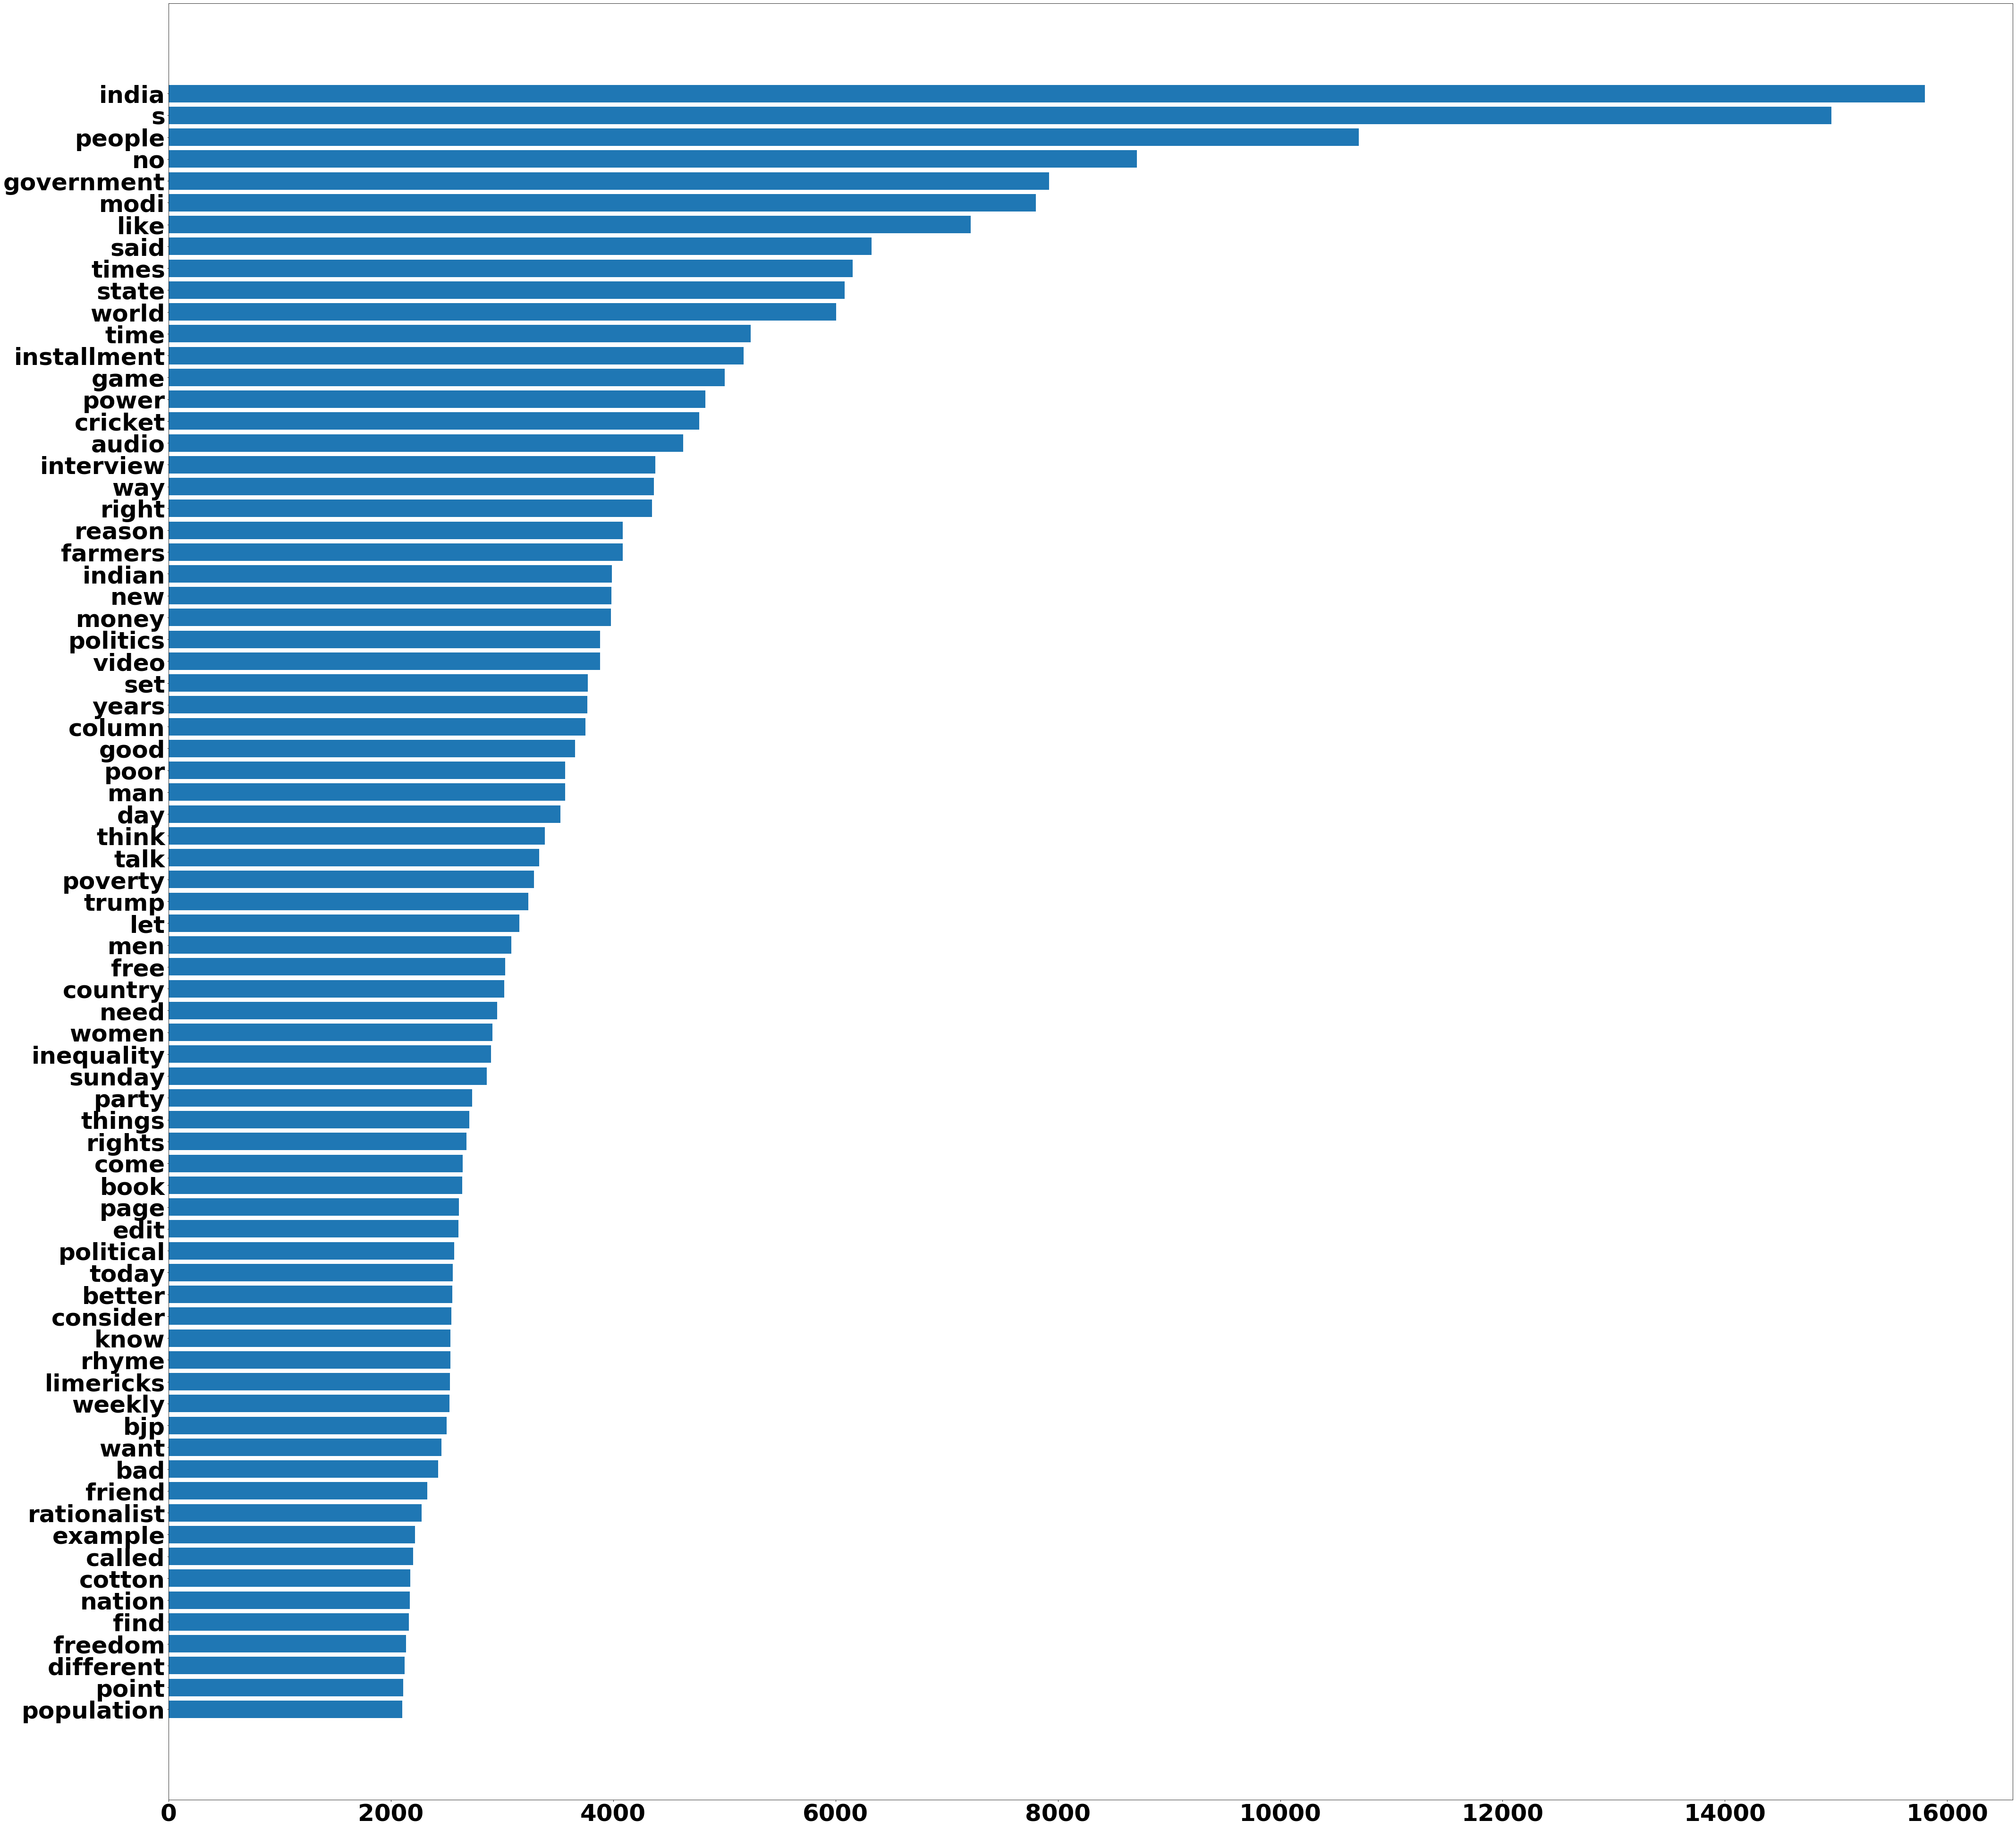

In [46]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:75], counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Frequency plot of words in blogs with stopwords retained

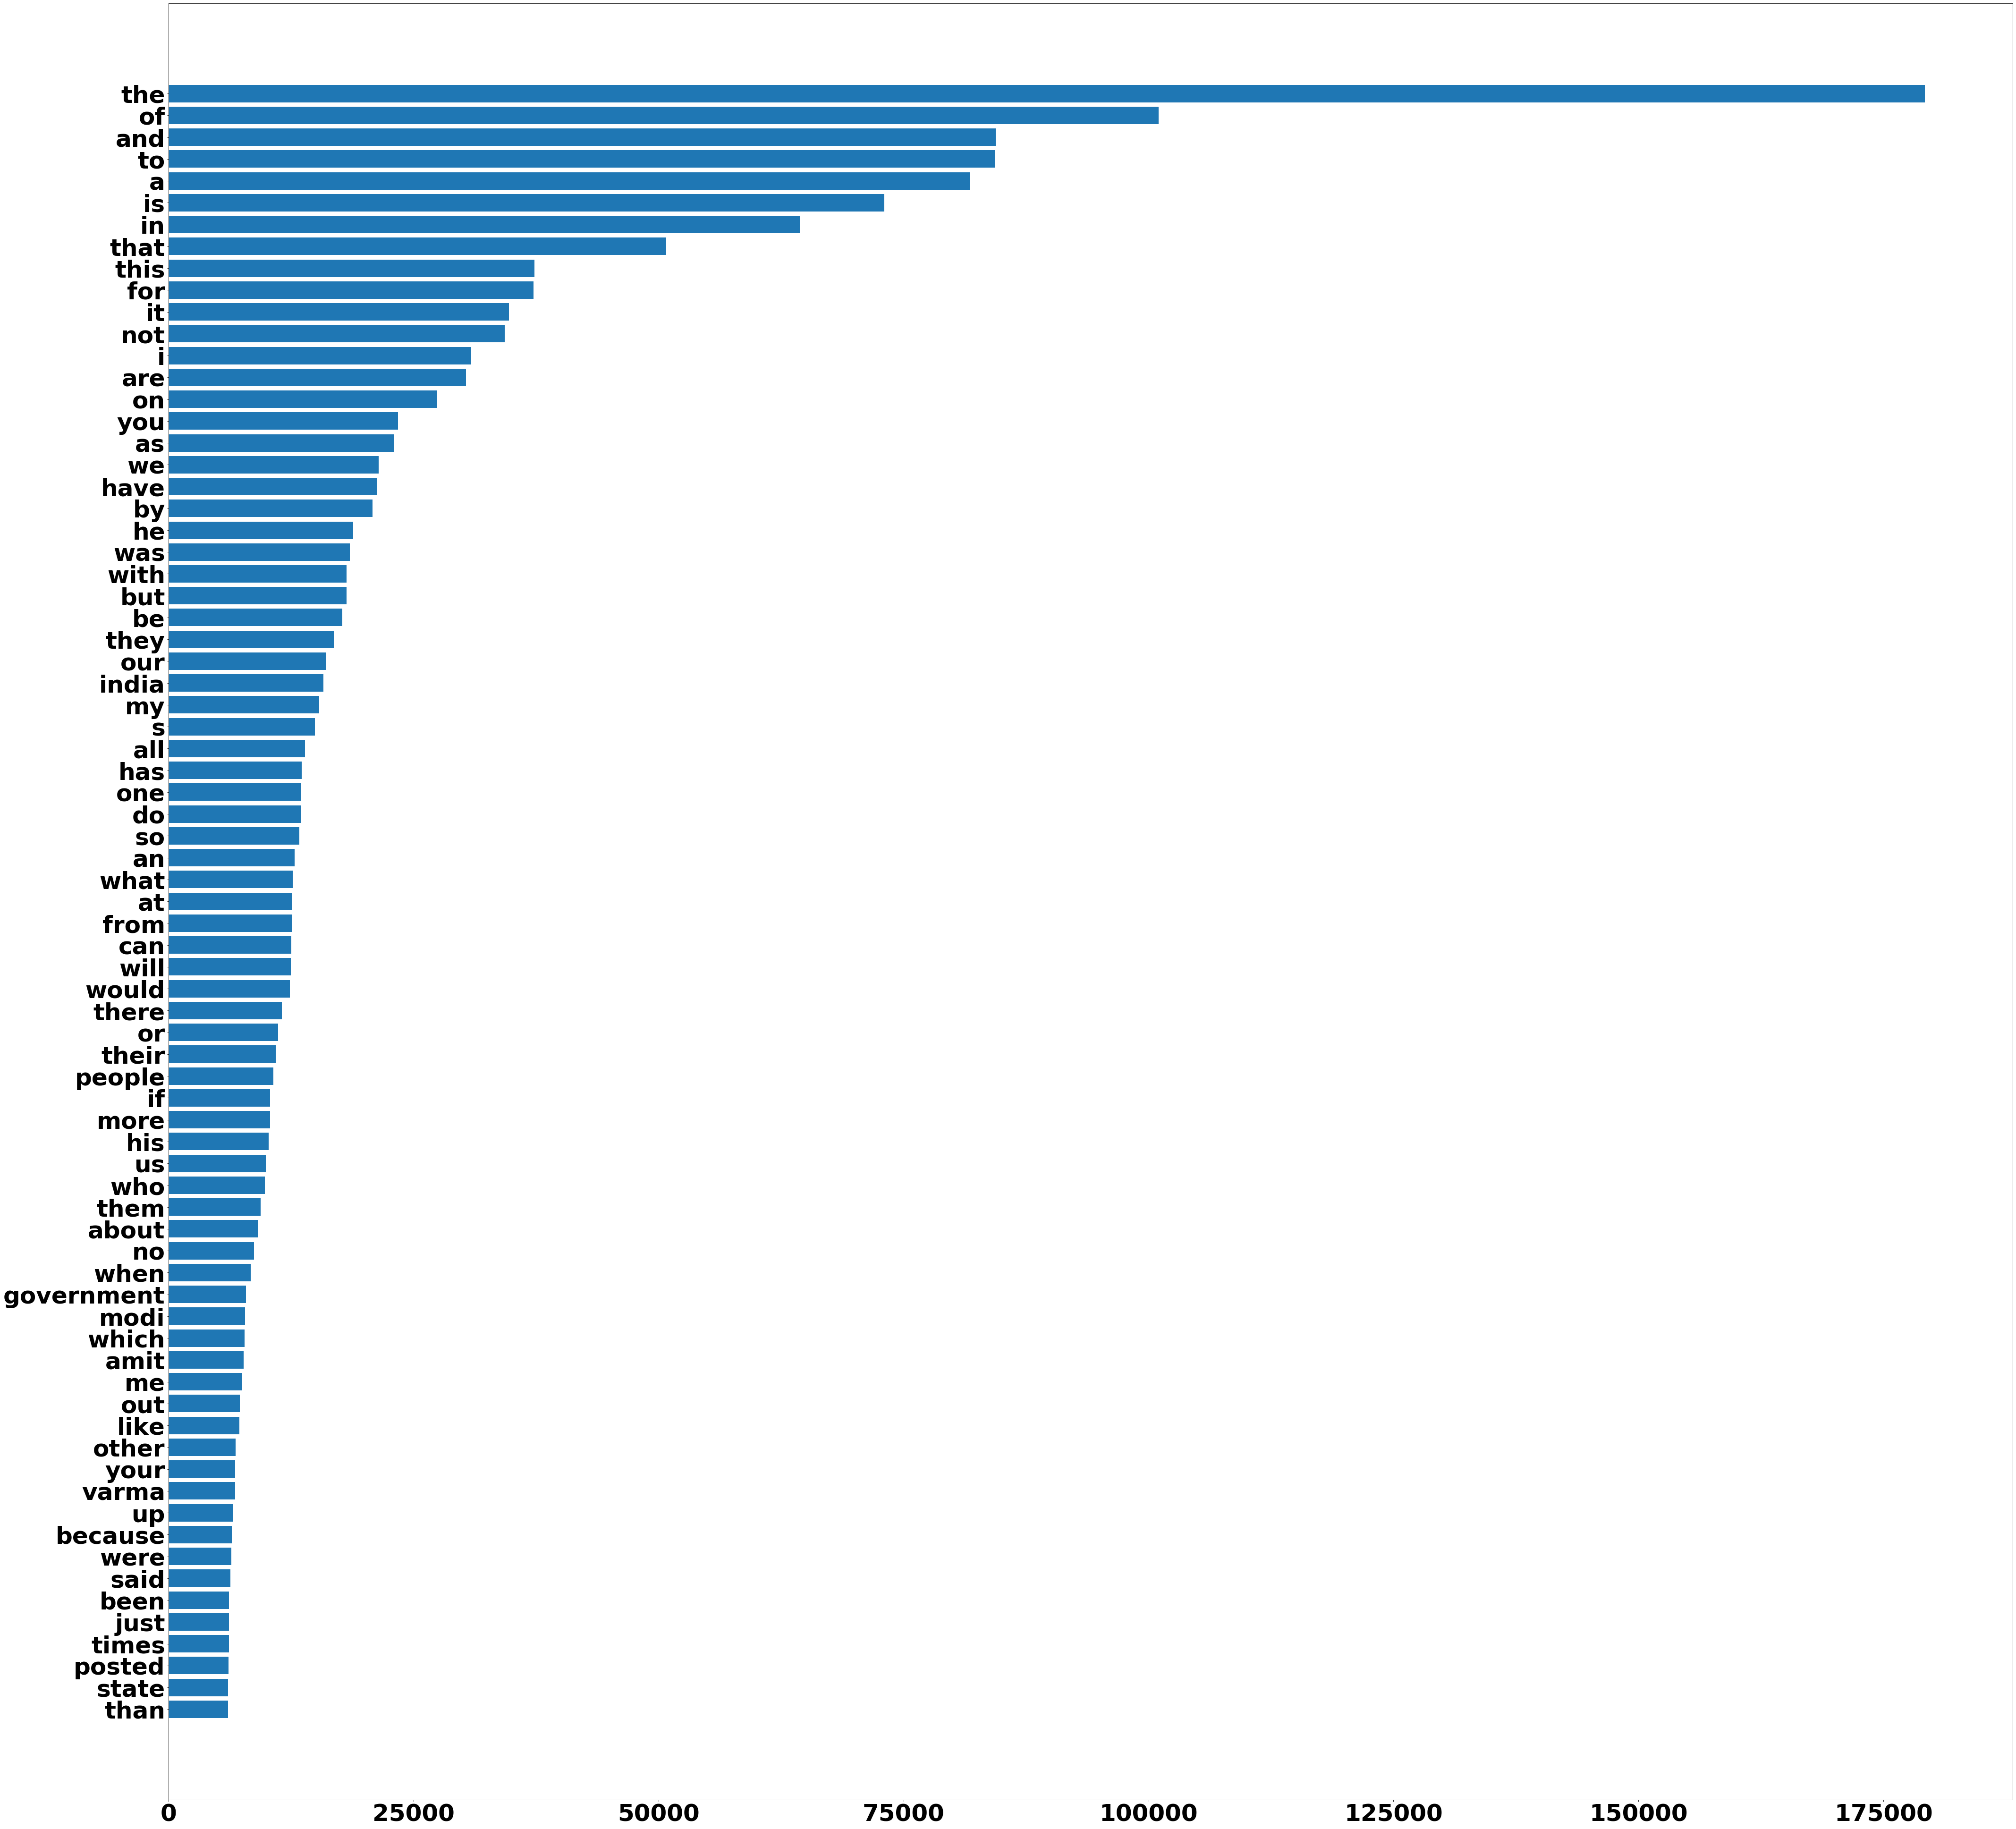

In [47]:
plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(all_values[:75], all_counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Observations from the Frequency Plots

1) The most occuring words present in both the graphs are quite different <br>
2) The most occuring words present in graph 1 (without stopwords) makes more sense.

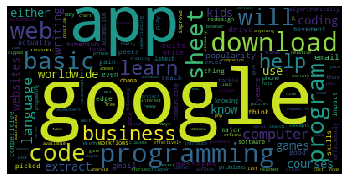

In [48]:
wordcloud = WordCloud().generate(data['text'][1])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

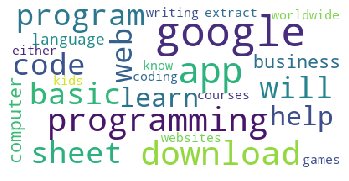

In [49]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(data['text'][1])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TF-IDF

In [50]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string

data['clean_text_stemmed'] = [' '.join(text) for text in data['clean_text_stemmed']]
data['clean_text_lemmatized'] = [' '.join(text) for text in data['clean_text_lemmatized']]
data['clean_text_lemmatized'][0]

'useful website internet smart increase productivity help learn new skill incredibly useful website solve problem cool url easy memorize save trip google know useful website miss list let know send send personalize email multiple people google sheet download gmail message attachment google drive extract email address gmail message save google sheet receive file size google drive track price favorite amazon item google sheet create smart twitter bot write single line code build bespoke solution use capability feature google automate business process drive business productivity deploy big company university worldwide installation download know india google'

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text_lemmatized'])

print(tfidf_matrix.shape)

(495, 12836)


In [52]:
terms = tfidf_vectorizer.get_feature_names()
print(type(terms))
terms[:5]

<class 'list'>


['aadhaar',
 'ability',
 'ability manage',
 'ability manage party',
 'ability manage party translate']

# K-mean Clustering

### Fitting the elbow curve to identify right number of clusters/topics

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import joblib
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


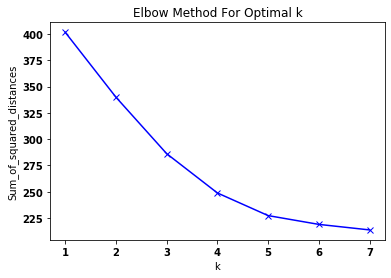

In [54]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [55]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

the cluster centers are [[0.0020612  0.00293982 0.00020457 ... 0.00020327 0.00020327 0.00020327]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00737369 0.00425839 0.00331823 ... 0.00331823 0.00331823 0.00331823]]


['doc_cluster_best_K.pkl']

### Getting the top words from each cluster

In [56]:
print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[0.0020612  0.00293982 0.00020457 ... 0.00020327 0.00020327 0.00020327]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00737369 0.00425839 0.00331823 ... 0.00331823 0.00331823 0.00331823]]
(4, 12836)


#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [57]:
km.cluster_centers_.argsort()

array([[ 4123,  9186,   392, ..., 11539,   993,  5385],
       [    0,  8547,  8548, ..., 10613, 11030,  2149],
       [    0,  8503,  8504, ...,  3372,  1766,   309],
       [ 3372,  2715, 12795, ...,  7307,  8282,  5385]], dtype=int64)

In [58]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[ 5385,   993, 11539, ...,   392,  9186,  4123],
       [ 2149, 11030, 10613, ...,  8548,  8547,     0],
       [  309,  1766,  3372, ...,  8504,  8503,     0],
       [ 5385,  8282,  7307, ..., 12795,  2715,  3372]], dtype=int64)

In [59]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("\n")
    print("Top words in Cluster-%d :" % i, end='')
    print("\n")
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:


Top words in Cluster-0 :

['india'],['blog'],['time'],['say'],['know'],['like'],

Top words in Cluster-1 :

['conversation'],['support'],['sort'],['brief'],['fascinating'],['smile'],

Top words in Cluster-2 :

['anonymous'],['color'],['essence'],['spirit'],['sex'],['mate'],

Top words in Cluster-3 :

['india'],['people'],['modi'],['government'],['farmer'],['state'],

In [60]:
data['cluster_group'] = clusters
pd.DataFrame(data).head(6)

index        Author                     title  \
0      0  Amit Agarwal     Most Useful Websites    
1      1  Amit Agarwal            Learn to Code    
2      2  Amit Agarwal          Voice Dictation    
3      3  Amit Agarwal        The Best Mac Apps    
4      4  Amit Agarwal   Sell your music online    
5      5  Amit Agarwal     Mail Merge for Gmail    

                                                link  \
0  https://www.labnol.org/internet/101-useful-web...   
1  https://www.labnol.org/internet/learn-coding-o...   
2                              https://dictation.io/   
3  https://www.labnol.org/software/essential-mac-...   
4  https://www.labnol.org/internet/sell-music-onl...   
5  https://www.labnol.org/internet/personalized-m...   

                                                text  word_count  \
0  here are the most useful websites on the inter...         184   
1  the learn to code movement has picked up momen...         483   
2  use the magic of speech recognition to write e...         184   
3  whether you are a new mac user or seasoned vet...         260   
4  it is now easier than ever before to sell your...         896   
5  mail merge for gmail lets you easily send pers...         615   

                                  clean_text_stemmed  \
0  use websit internet smarter increas product he...   
1  learn code movement pick momentum worldwid act...   
2  use magic speech recognit write email document...   
3  new mac user season veteran look s collect dow...   
4  easier sell music worldwid audienc musician ch...   
5  mail merg gmail let easili send person messag ...   

                               clean_text_lemmatized  \
0  useful website internet smart increase product...   
1  learn code movement pick momentum worldwide ac...   
2  use magic speech recognition write email docum...   
3  new mac user season veteran look s collection ...   
4  easy sell music worldwide audience musician ch...   
5  mail merge gmail let easily send personalized ...   

                                        text_stemmed  \
0  [here, are, the, most, use, websit, on, the, i...   
1  [the, learn, to, code, movement, has, pick, up...   
2  [use, the, magic, of, speech, recognit, to, wr...   
3  [whether, you, are, a, new, mac, user, or, sea...   
4  [it, is, now, easier, than, ever, befor, to, s...   
5  [mail, merg, for, gmail, let, you, easili, sen...   

                                     text_lemmatized  cluster_group  
0  [here, be, the, most, useful, website, on, the...              0  
1  [the, learn, to, code, movement, have, pick, u...              0  
2  [use, the, magic, of, speech, recognition, to,...              0  
3  [whether, -PRON-, be, a, new, mac, user, or, s...              0  
4  [-PRON-, be, now, easy, than, ever, before, to...              0  
5  [mail, merge, for, gmail, let, -PRON-, easily,...              0

In [61]:
data.keys()

dict_keys(['index', 'Author', 'title', 'link', 'text', 'word_count', 'clean_text_stemmed', 'clean_text_lemmatized', 'text_stemmed', 'text_lemmatized', 'cluster_group'])

In [62]:
cluster_df = pd.DataFrame(data)
cluster_df['cluster_group'].value_counts()

0    234
3    128
2     73
1     60
Name: cluster_group, dtype: int64

## Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [63]:
##Step 1
cluster_df['tokenized_text'] = [text.split(' ') for text in cluster_df['clean_text_lemmatized']]

In [64]:
##Step 2
grouped_text = cluster_df.groupby('cluster_group')['tokenized_text']

In [65]:
from itertools import chain
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)
    
frequent_words_df.head()

counts cluster_id  \
0  [4631, 4031, 3833, 3640, 3038, 2341, 2171, 192...          0   
1  [120, 120, 60, 60, 60, 60, 60, 60, 60, 60, 60,...          1   
2  [83, 79, 76, 74, 73, 73, 73, 73, 73, 73, 73, 7...          2   
3  [13627, 11230, 9428, 8059, 7395, 7142, 6742, 6...          3   

                                              values  
0  [audio, interview, video, s, talk, say, india,...  
1  [support, conversation, art, trifle, touch, so...  
2  [life, love, offer, gentleman, adventure, perf...  
3  [india, s, people, government, modi, no, time,...

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


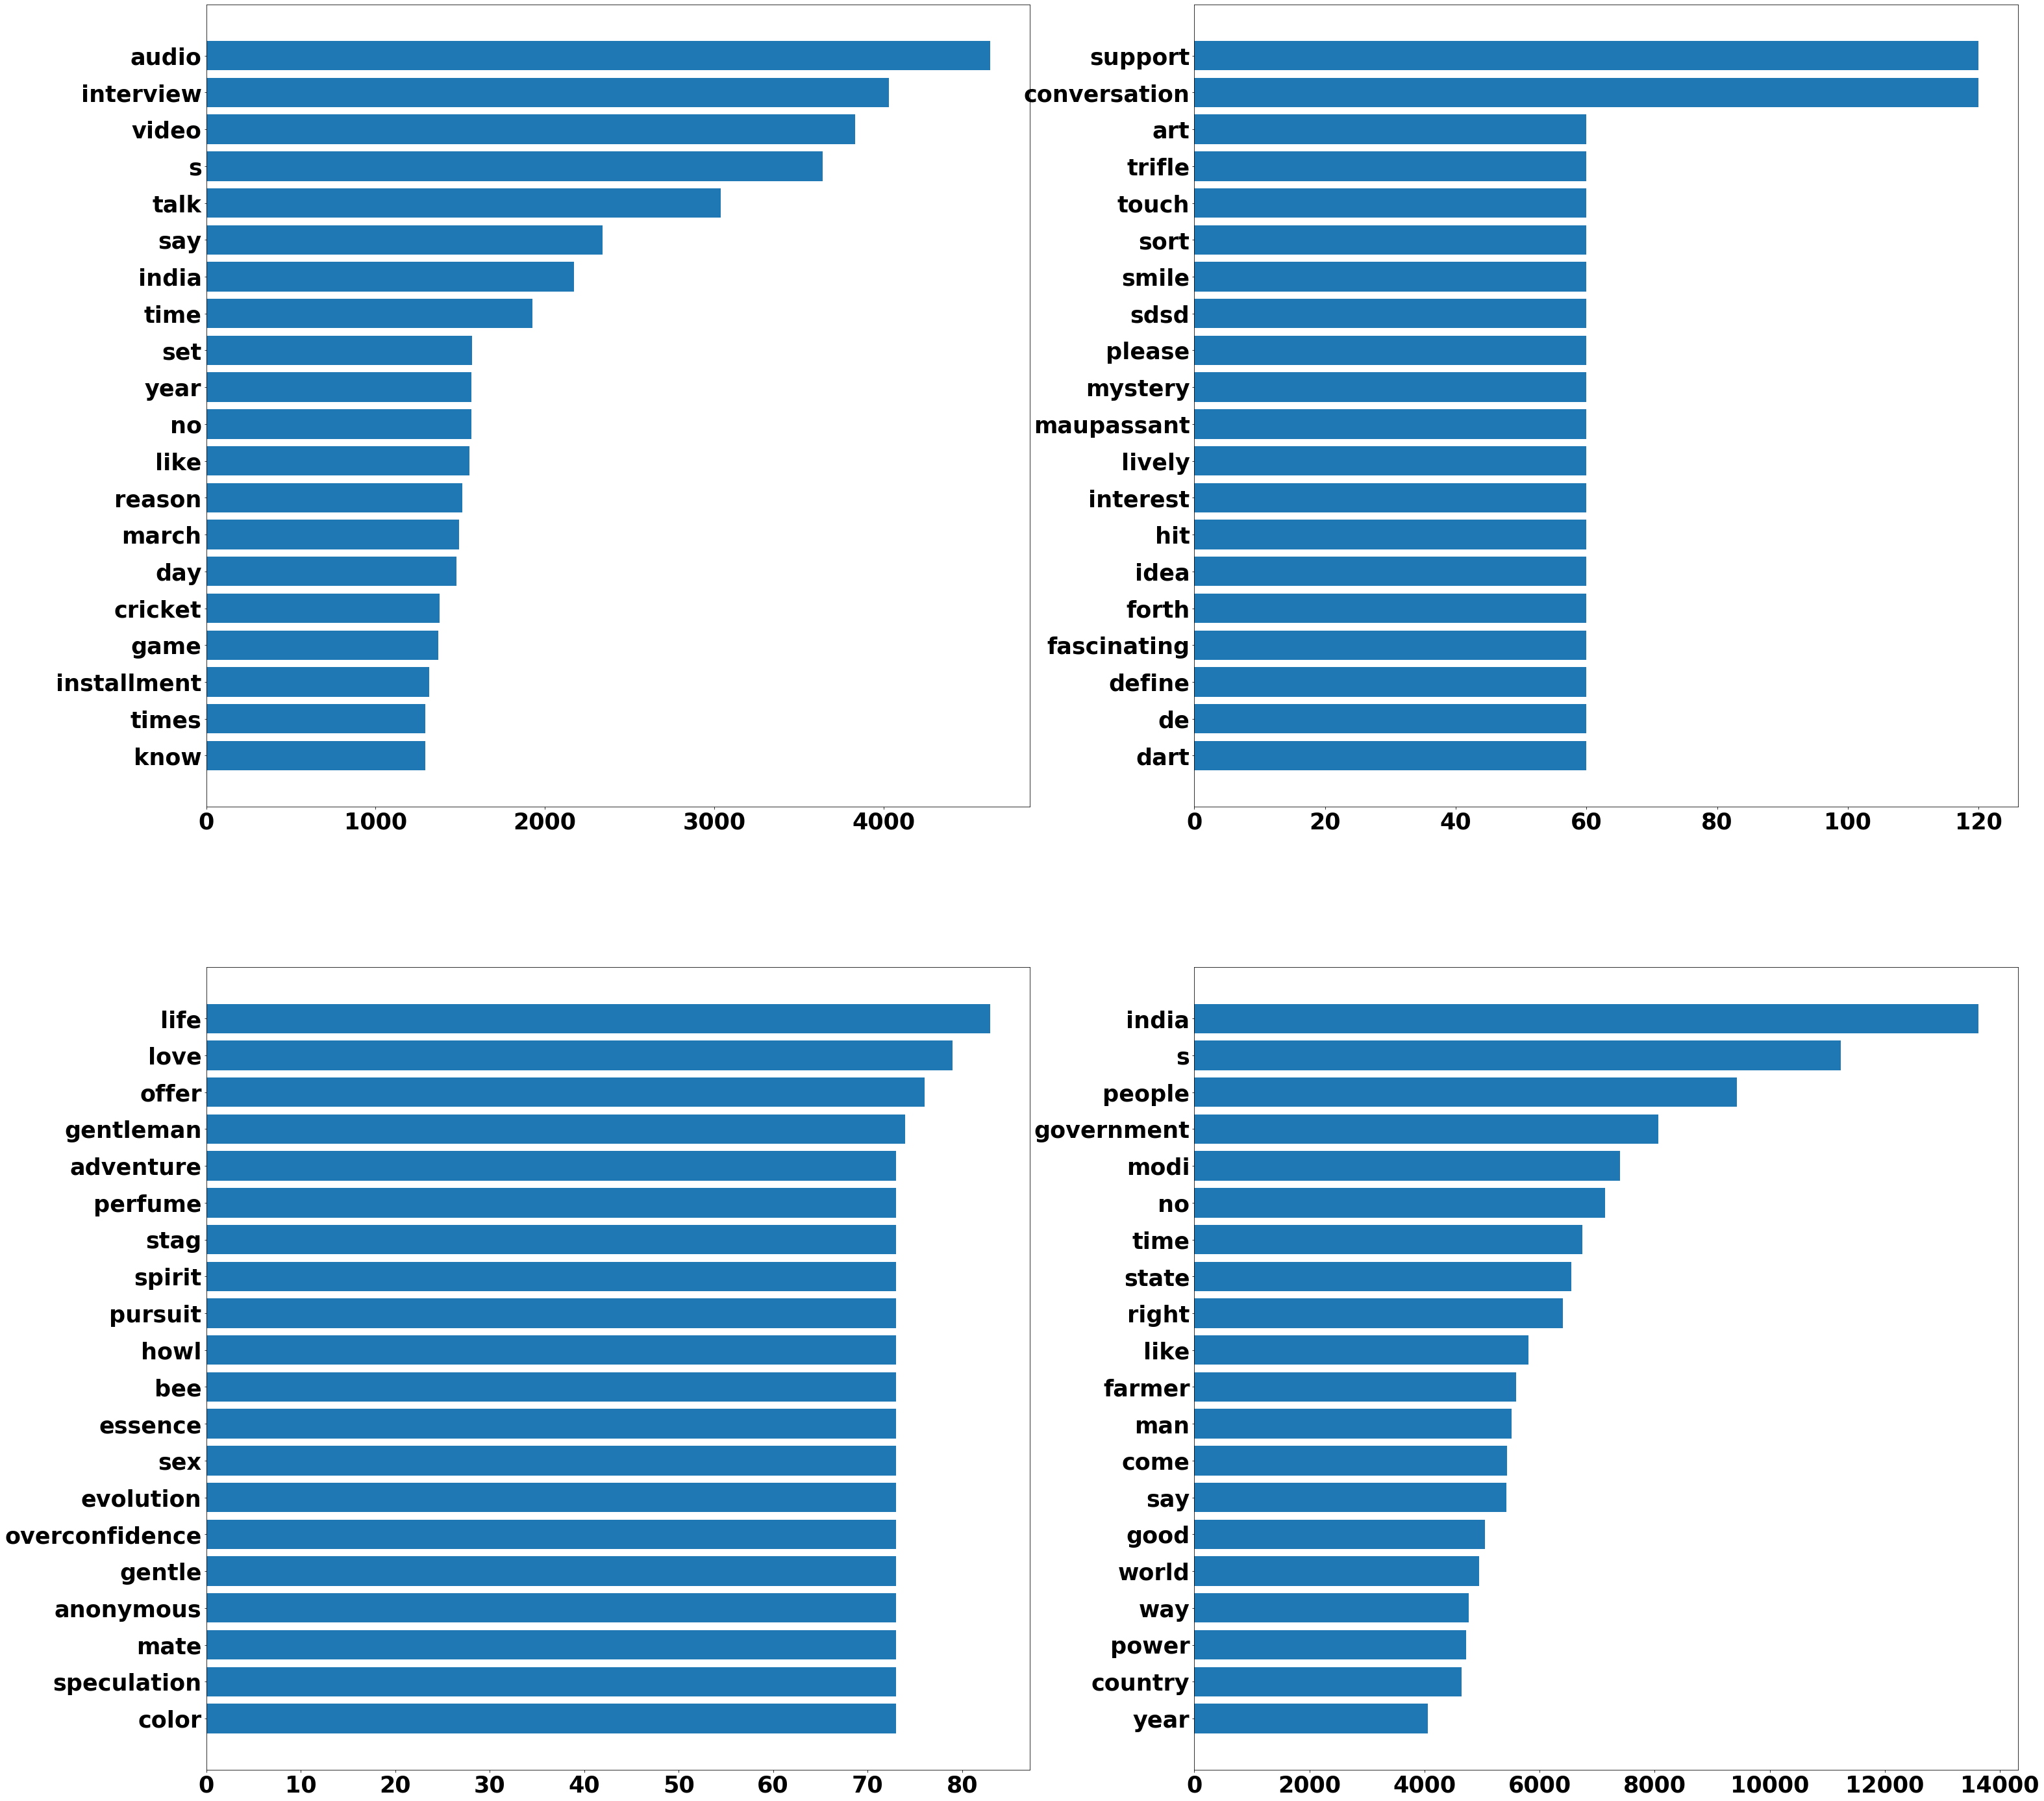

In [66]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

### Truncated SVD (Latent Semantic Analysis - LSA) using Scikitlearn

<img src="SVD1.png">

In this case, U ∈ ℝ^(m ⨉ t) emerges as our document-topic matrix, and V ∈ ℝ^(n ⨉ t) becomes our term-topic matrix. In both U and V, the columns correspond to one of our t topics. 

In U, rows represent document vectors expressed in terms of topics; in V, rows represent term vectors expressed in terms of topics.

In [67]:
from sklearn.decomposition import TruncatedSVD

n_components = 26

svd_model = TruncatedSVD(n_components=n_components, 
                         algorithm='randomized',n_iter=20,random_state=143)

svd_matrix = svd_model.fit(tfidf_matrix)

svd_matrix

TruncatedSVD(algorithm='randomized', n_components=26, n_iter=20,
             random_state=143, tol=0.0)

In [68]:
print(f"Explained Variance Ratio : {svd_matrix.explained_variance_ratio_}") 
print(f"\nTotal Explained Variance : {round(svd_matrix.explained_variance_ratio_.sum() * 100, 2)} %")
print(f"\nThe singular values are {svd_matrix.singular_values_}")

Explained Variance Ratio : [0.13072096 0.13358836 0.11109383 0.07489808 0.04242061 0.02865602
 0.02320884 0.01965477 0.01542075 0.01464631 0.01296914 0.01076466
 0.01046743 0.01022389 0.00934738 0.00898234 0.00866444 0.00810603
 0.00753378 0.00739069 0.00681253 0.00657377 0.00643611 0.00617132
 0.00609929 0.00597287]

Total Explained Variance : 72.68 %

The singular values are [11.4307132   7.75823987  7.08967315  5.52978602  4.27593319  3.39375496
  3.05691903  2.83543707  2.48986976  2.42528257  2.28456816  2.08121238
  2.05229139  2.02871297  1.94009383  1.90035893  1.86692818  1.80428194
  1.7395321   1.72329286  1.65471454  1.62576475  1.60778942  1.57428524
  1.5668523   1.54876484]


### Picking the few most important words in each topic

The components of svd_model are our topics and we can access them using svdmodel.components.<br>
let's print a few most important words in each of the 4 topics and see how our model has done.

In [69]:
for i, comp in enumerate(svd_model.components_):
    print(f"The component is {comp} and shape is {comp.shape}")
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(f"{t[0]} -- {t[1]}")
    print(" ")

The component is [0.00810515 0.00563472 0.00306713 ... 0.00306672 0.00306672 0.00306672] and shape is (12836,)
Topic 0: 
india -- 0.24736597849039493
people -- 0.165588449583804
government -- 0.14495433444415715
modi -- 0.14432480265856157
farmer -- 0.1281737412822599
time -- 0.1260936633751601
 
The component is [-0.00090251 -0.00016502 -0.00033478 ... -0.00034177 -0.00034177
 -0.00034177] and shape is (12836,)
Topic 1: 
conversation -- 0.4640813627424729
support -- 0.3861760452347069
sort -- 0.27073616968324066
brief -- 0.2484322850238743
fascinating -- 0.2467794978212265
smile -- 0.22998755806681706
 
The component is [-0.00148982  0.00016938 -0.00053313 ... -0.0005298  -0.0005298
 -0.0005298 ] and shape is (12836,)
Topic 2: 
anonymous -- 0.34444445656047445
color -- 0.342884465406294
essence -- 0.32673908389354883
spirit -- 0.32285798636587293
sex -- 0.3189623654160173
mate -- 0.2880750770992544
 
The component is [ 0.01398569 -0.00355792 -0.00189395 ... -0.0018693  -0.0018693
 -0.

### Tagging each document with a topic

In [70]:
doc_topic_matrix = svd_matrix.transform(tfidf_matrix)
print("\nDoc Topic Matrix: \n",doc_topic_matrix)
svd_categories = np.argmax(doc_topic_matrix, axis=1)
print("\nSVD Categories: \n",svd_categories)


Doc Topic Matrix: 
 [[ 0.1156942   0.00958544  0.00169092 ...  0.03880122 -0.02445013
   0.00316227]
 [ 0.18066326  0.01204835  0.01710798 ... -0.02151768 -0.02290418
  -0.02039246]
 [ 0.09129137  0.10027726  0.00173524 ... -0.12343409 -0.05800571
   0.12092737]
 ...
 [ 0.22312531 -0.00319848  0.01472339 ...  0.01311877  0.01990232
   0.09103499]
 [ 0.11648349  0.0091784   0.00291962 ...  0.03079464 -0.01365124
   0.00272656]
 [ 0.14449318  0.02727134  0.00391155 ... -0.05761241  0.08141411
  -0.16159963]]

SVD Categories: 
 [ 8  8  8  8  7  8 22  0  4  0  4  4  0  0  0  0  6  0  6  0  0  0 16  0
 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24 24 21  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3 16  0  0  0  0
  0  0  0  0  0  0  0  0  0  3  3  3  0  0  3  3 16  0  0  0  0  0 21 16
  0  0  0  0  0  3  3  3  0  3  3  0  0  4  4  0  0  0  0  0  0  0  0  6
  6  4  0  6  0  0  0 11  4  0

In [71]:
data['SVD_group'] = svd_categories
pd.DataFrame(data).head(6)

index        Author                     title  \
0      0  Amit Agarwal     Most Useful Websites    
1      1  Amit Agarwal            Learn to Code    
2      2  Amit Agarwal          Voice Dictation    
3      3  Amit Agarwal        The Best Mac Apps    
4      4  Amit Agarwal   Sell your music online    
5      5  Amit Agarwal     Mail Merge for Gmail    

                                                link  \
0  https://www.labnol.org/internet/101-useful-web...   
1  https://www.labnol.org/internet/learn-coding-o...   
2                              https://dictation.io/   
3  https://www.labnol.org/software/essential-mac-...   
4  https://www.labnol.org/internet/sell-music-onl...   
5  https://www.labnol.org/internet/personalized-m...   

                                                text  word_count  \
0  here are the most useful websites on the inter...         184   
1  the learn to code movement has picked up momen...         483   
2  use the magic of speech recognition to write e...         184   
3  whether you are a new mac user or seasoned vet...         260   
4  it is now easier than ever before to sell your...         896   
5  mail merge for gmail lets you easily send pers...         615   

                                  clean_text_stemmed  \
0  use websit internet smarter increas product he...   
1  learn code movement pick momentum worldwid act...   
2  use magic speech recognit write email document...   
3  new mac user season veteran look s collect dow...   
4  easier sell music worldwid audienc musician ch...   
5  mail merg gmail let easili send person messag ...   

                               clean_text_lemmatized  \
0  useful website internet smart increase product...   
1  learn code movement pick momentum worldwide ac...   
2  use magic speech recognition write email docum...   
3  new mac user season veteran look s collection ...   
4  easy sell music worldwide audience musician ch...   
5  mail merge gmail let easily send personalized ...   

                                        text_stemmed  \
0  [here, are, the, most, use, websit, on, the, i...   
1  [the, learn, to, code, movement, has, pick, up...   
2  [use, the, magic, of, speech, recognit, to, wr...   
3  [whether, you, are, a, new, mac, user, or, sea...   
4  [it, is, now, easier, than, ever, befor, to, s...   
5  [mail, merg, for, gmail, let, you, easili, sen...   

                                     text_lemmatized  cluster_group  SVD_group  
0  [here, be, the, most, useful, website, on, the...              0          8  
1  [the, learn, to, code, movement, have, pick, u...              0          8  
2  [use, the, magic, of, speech, recognition, to,...              0          8  
3  [whether, -PRON-, be, a, new, mac, user, or, s...              0          8  
4  [-PRON-, be, now, easy, than, ever, before, to...              0          7  
5  [mail, merge, for, gmail, let, -PRON-, easily,...              0          8

#### Clustering the Document-Topic matrix

In [72]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(doc_topic_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

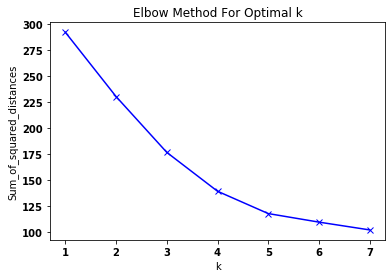

In [73]:
## Plot the elbow

## Distortion, on the y-axis, corresponds to our cost function: 
## the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

## As K increases the corresponding distortion value will tend to zero, 
## because you end up having just one data point per cluster. With only one data point in per cluster, 
## the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [74]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(doc_topic_matrix)

clusters = km.labels_.tolist()

centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_topic_cluster_best_K.pkl')

the cluster centers are [[ 7.87752285e-02  9.95882775e-01 -3.62633780e-02  8.71674631e-03
  -1.64128035e-02  1.39397849e-02  6.95217936e-03 -3.58017900e-03
   4.71554989e-03  2.62110773e-04 -2.88476593e-04  5.42784754e-04
  -4.74147405e-04  8.62211633e-04  1.11508698e-03 -5.04007624e-06
  -5.83007206e-06  4.32508841e-04 -5.40837051e-04 -2.71602350e-04
   1.37441079e-03 -1.64719304e-04 -5.24300998e-04  3.70067308e-04
   1.24922341e-03 -2.67934992e-04]
 [ 9.07204237e-01 -4.05783461e-02 -5.60553953e-02 -8.55887531e-02
  -1.06036027e-01  1.89551200e-02 -1.03788085e-02 -3.28641971e-03
  -1.51041348e-03  9.40607988e-03 -6.10381166e-03 -3.29066373e-03
  -1.04560125e-04 -3.65521906e-03  6.52050666e-03 -2.40968385e-03
  -5.28582428e-03 -1.60724122e-03  5.33527047e-03 -2.44320992e-03
  -1.34711769e-03  1.37945751e-05 -4.90803606e-03 -5.63253748e-04
  -2.41485902e-03  1.93956394e-03]
 [ 1.07910712e-01  3.02725312e-02  7.98598712e-01  5.62990982e-03
  -3.20395730e-02  1.13136082e-02 -7.42736880e-0

['doc_topic_cluster_best_K.pkl']

In [75]:
clusters = km.labels_.tolist()
data['doc_topic_cluster_group'] = clusters

In [76]:
doc_cluster_df = pd.DataFrame(data)
doc_cluster_df['doc_topic_cluster_group'].value_counts()

3    237
1    128
2     70
0     60
Name: doc_topic_cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [77]:
##Step 1
doc_cluster_df['tokenized_text'] = [text.split(' ') for text in doc_cluster_df['clean_text_lemmatized']]

In [78]:
##Step 2
grouped_text = doc_cluster_df.groupby('doc_topic_cluster_group')['tokenized_text']

In [79]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [80]:
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [81]:
frequent_words_df.head()

counts cluster_id  \
0  [120, 120, 60, 60, 60, 60, 60, 60, 60, 60, 60,...          0   
1  [13627, 11230, 9428, 8059, 7395, 7142, 6742, 6...          1   
2  [80, 73, 71, 70, 70, 70, 70, 70, 70, 70, 70, 7...          2   
3  [4631, 4031, 3833, 3640, 3038, 2341, 2171, 192...          3   

                                              values  
0  [support, conversation, art, trifle, touch, so...  
1  [india, s, people, government, modi, no, time,...  
2  [life, offer, gentleman, love, color, perfume,...  
3  [audio, interview, video, s, talk, say, india,...

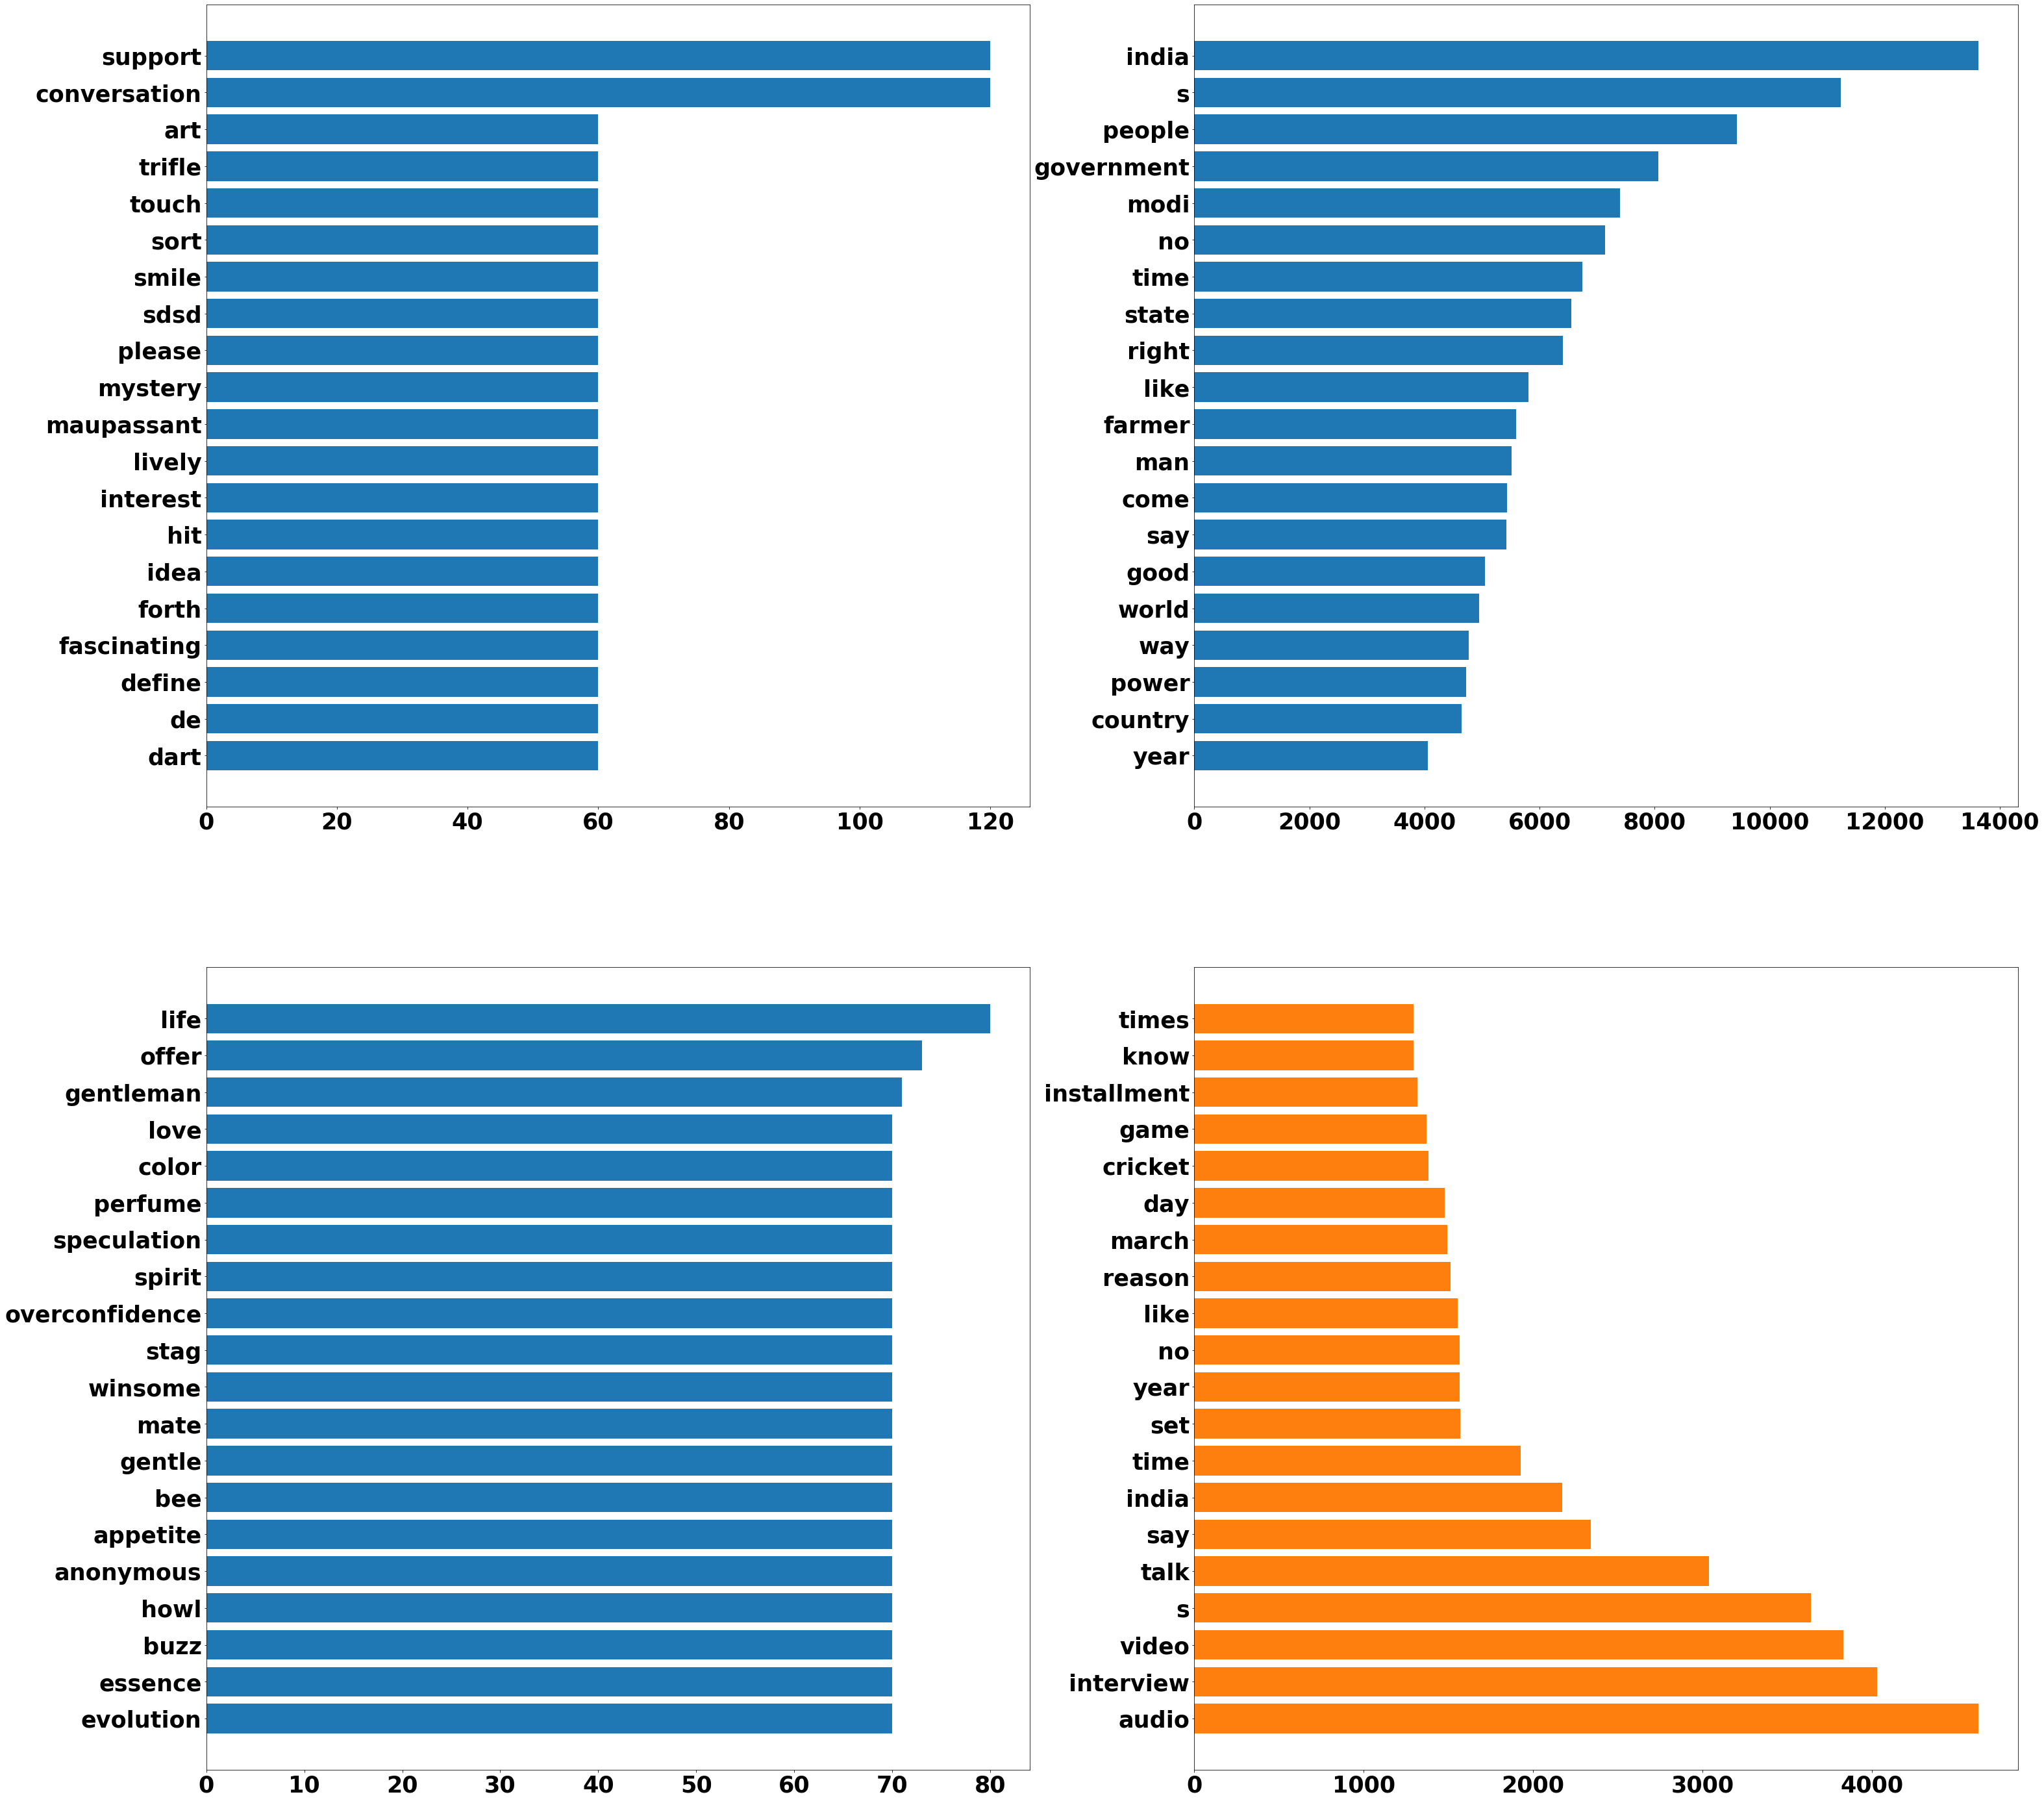

In [82]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()
plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

## Observations

We can notice that with document topic matrix (with just 26 components) we were able to achieve similar results when compared to tfidf matrix. 

## References:
    
    **Beautiful soup**
    
    https://www.crummy.com/software/BeautifulSoup/bs4/doc/